In [1]:
%pylab inline
from scbgroup import echem as ec
from glob import glob
import numpy as np
file_list = glob('*.mpt')
df_list = [ec.read_mpt(f)for f in file_list]

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Grouping Files

In [2]:
ZnPVAGA_ECHlist_07 = [];
ZnPVAGA_ECHlist_08 = [];
ZnPVAGA_ECHlist_09 = [];
ZnPVAGA_ECHlist_1  = [];

for file in file_list:
    if file.startswith("ZnPVAGAECH_07"):
        ZnPVAGA_ECHlist_07.append(file)
    if file.startswith("ZnPVAGAECH_08"):
        ZnPVAGA_ECHlist_08.append(file)
    if file.startswith("ZnPVAGAECH_09"):
        ZnPVAGA_ECHlist_09.append(file)
    if file.startswith("ZnPVAGAECH_1"):
        ZnPVAGA_ECHlist_1.append(file)
    
        
ZnPVAGA_ECH_07 = [ec.read_mpt(f)for f in ZnPVAGA_ECHlist_07]
ZnPVAGA_ECH_08 = [ec.read_mpt(f)for f in ZnPVAGA_ECHlist_08]
ZnPVAGA_ECH_09 = [ec.read_mpt(f)for f in ZnPVAGA_ECHlist_09]
ZnPVAGA_ECH_1 = [ec.read_mpt(f)for f in ZnPVAGA_ECHlist_1]

ZnPVA_ECHlist_07 = [];
ZnPVA_ECHlist_08 = [];
ZnPVA_ECHlist_09 = [];
ZnPVA_ECHlist_1  = [];

for file in file_list:
    if file.startswith("ZnPVAECH_07"):
        ZnPVA_ECHlist_07.append(file)
    if file.startswith("ZnPVAECH_08"):
        ZnPVA_ECHlist_08.append(file)
    if file.startswith("ZnPVAECH_09"):
        ZnPVA_ECHlist_09.append(file)
    if file.startswith("ZnPVAECH_1"):
        ZnPVA_ECHlist_1.append(file)
    
        
ZnPVA_ECH_07 = [ec.read_mpt(f)for f in ZnPVA_ECHlist_07]
ZnPVA_ECH_08 = [ec.read_mpt(f)for f in ZnPVA_ECHlist_08]
ZnPVA_ECH_09 = [ec.read_mpt(f)for f in ZnPVA_ECHlist_09]
ZnPVA_ECH_1 = [ec.read_mpt(f)for f in ZnPVA_ECHlist_1]

### Parameters

In [3]:
D = 0.5 # cm
A = (D/2)**2 * pi

In [4]:
F = 96485 * 1000                # mA s / mol
D = 1.13 * 10**(-9) *100 **2    # cm2/s
v = 0.0113                      # cm2/s
C = 0.0001                      # mol/m3

In [5]:
rpm = [1600,900,625,330,220,140,100,140,220,330,625,900,1600]

## Extracting current densities

### Zn PVA GA at -0.7V/RHE

In [6]:
order = array([1,2,3])
ZnPVAGA_ECHlist_07 = [f'ZnPVAGAECH_07 RDE {i} ECH 1600 rpm K-L.mpt' for i in order]        
ZnPVAGA_ECH_07 = [ec.read_mpt(f)for f in ZnPVAGA_ECHlist_07]

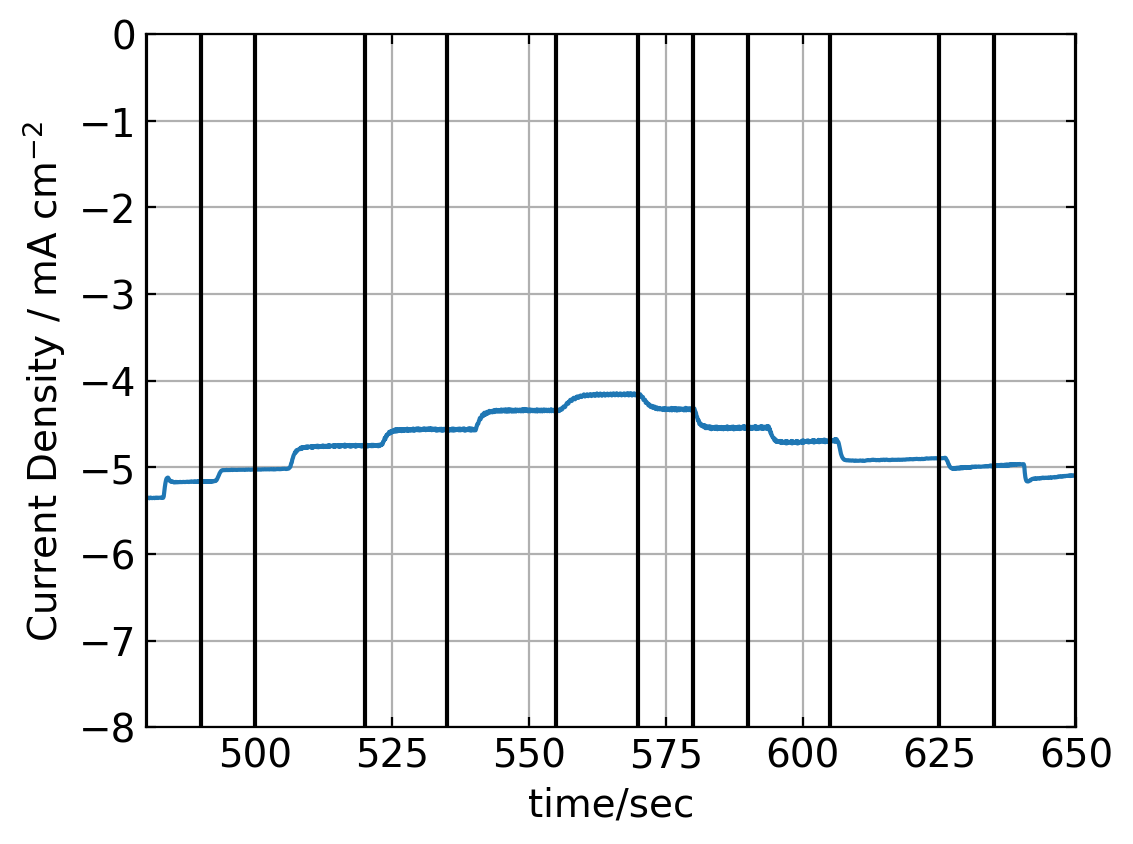

In [7]:
for df in ZnPVAGA_ECH_07[0:1]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-8,0)
    xlim(480,650)
grid()    
x_list = [480,490,500,520,535,555,570,580,590,605,625,635,650]
for i in x_list:
    axvline(x=i,color='black')
show() 

time_ZPG07_1 = [480,490,500,520,535,555,570,580,590,605,625,635,650]
I_ZPG07_1 = []


for i in arange(13):
    icd = ZnPVAGA_ECH_07[0]['icd'][ZnPVAGA_ECH_07[0]['time/s'] < time_ZPG07_1[i]][-1:]
    I_ZPG07_1.extend(-1/icd)

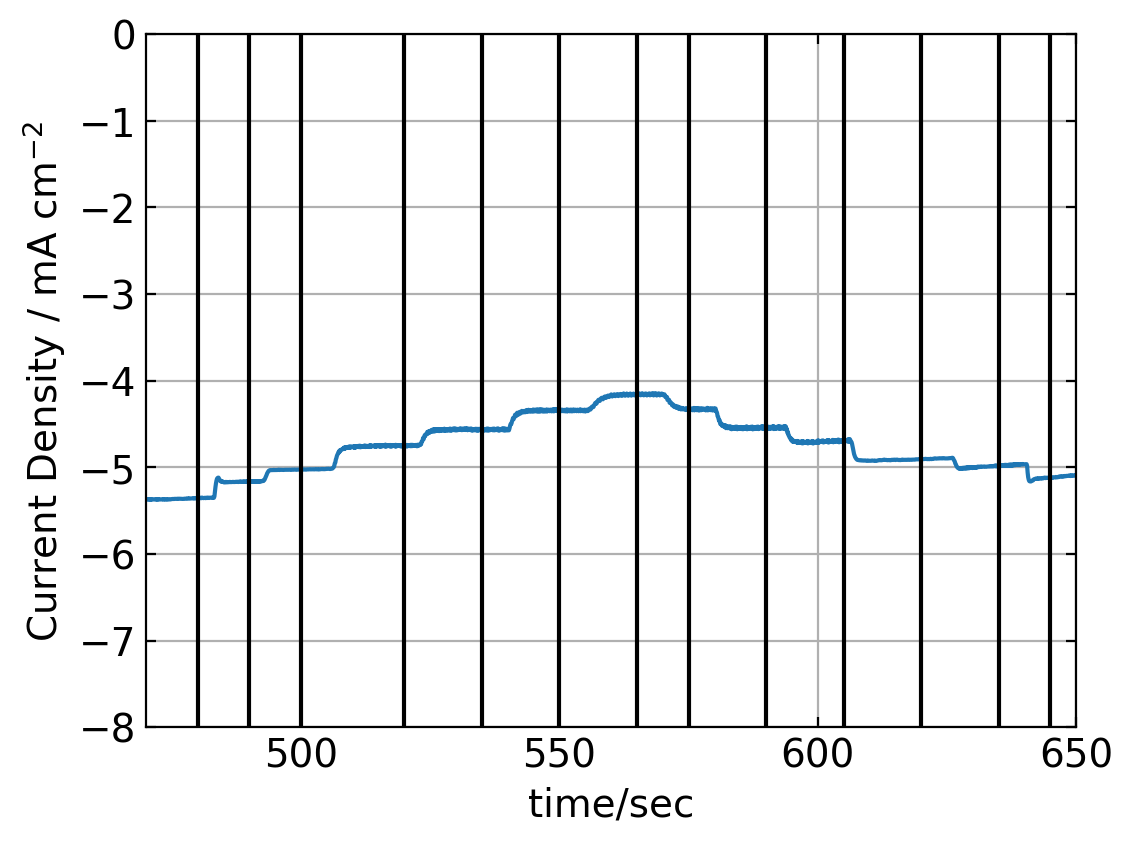

In [9]:
for df in ZnPVAGA_ECH_07[1:2]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-8,0)
    xlim(470,650)
grid()    

x_list = [480,490,500,520,535,550,565,575,590,605,620,635,645]
for i in x_list:
    axvline(x=i,color='black')

show() 

time_ZPG07_2 = [480,490,500,520,535,550,565,575,590,605,620,635,645]
I_ZPG07_2 = []
for i in arange(13):
    icd = ZnPVAGA_ECH_07[1]['icd'][ZnPVAGA_ECH_07[1]['time/s'] < time_ZPG07_2[i]][-1:]
    I_ZPG07_2.extend(-1/icd)

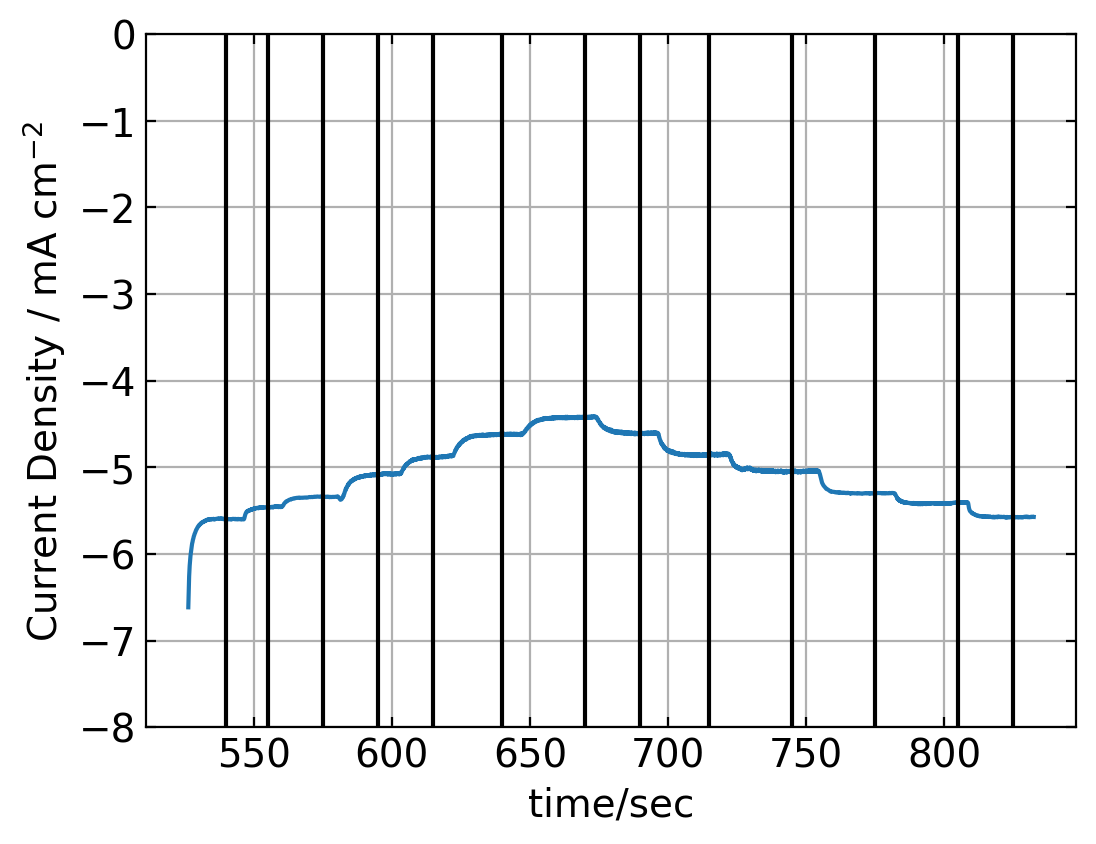

In [10]:
for df in ZnPVAGA_ECH_07[2:3]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-8,0)
    
grid()    
x_list = [540,555,575,595,615,640,670,690,715,745,775,805,825]
for i in x_list:
    axvline(x=i,color='black')


show() 

time_ZPG07_3 = [540,555,575,595,615,640,670,690,715,745,775,805,825]
I_ZPG07_3 = []
for i in arange(13):
    icd = ZnPVAGA_ECH_07[2]['icd'][ZnPVAGA_ECH_07[2]['time/s'] < time_ZPG07_3[i]][-1:]
    I_ZPG07_3.extend(-1/icd)

In [11]:
from scipy.optimize import curve_fit

def line(x,m,b):
    return m*x+b

rpm_avg = [1600,900,625,330,220,140,100]

In [12]:
ZnPVAGA_07_1600 = [I_ZPG07_1[0],I_ZPG07_1[12],I_ZPG07_2[0],I_ZPG07_2[12],I_ZPG07_3[0],I_ZPG07_3[12]]
ZnPVAGA_07_900 = [I_ZPG07_1[1],I_ZPG07_1[11],I_ZPG07_2[1],I_ZPG07_2[11],I_ZPG07_3[1],I_ZPG07_3[11]]
ZnPVAGA_07_625 = [I_ZPG07_1[2],I_ZPG07_1[10],I_ZPG07_2[2],I_ZPG07_2[10],I_ZPG07_3[2],I_ZPG07_3[10]]
ZnPVAGA_07_330 = [I_ZPG07_1[3],I_ZPG07_1[9],I_ZPG07_2[3],I_ZPG07_2[9],I_ZPG07_3[3],I_ZPG07_3[9]]
ZnPVAGA_07_220 = [I_ZPG07_1[4],I_ZPG07_1[8],I_ZPG07_2[4],I_ZPG07_2[8],I_ZPG07_3[4],I_ZPG07_3[8]]
ZnPVAGA_07_140 = [I_ZPG07_1[5],I_ZPG07_1[7],I_ZPG07_2[5],I_ZPG07_2[7],I_ZPG07_3[5],I_ZPG07_3[7]]
ZnPVAGA_07_100 = [I_ZPG07_2[6],I_ZPG07_3[6],I_ZPG07_3[6]]

avg_I_ZnPVAGA_07 = [mean(ZnPVAGA_07_1600),mean(ZnPVAGA_07_900),mean(ZnPVAGA_07_625),mean(ZnPVAGA_07_330),mean(ZnPVAGA_07_220),mean(ZnPVAGA_07_140),mean(ZnPVAGA_07_100)]


### Zn PVA GA at -0.8V/RHE 

In [13]:
order = array([1,2,3])
ZnPVAGA_ECHlist_08 = [f'ZnPVAGAECH_08 RDE {i} ECH 1600 rpm K-L.mpt' for i in order]        
ZnPVAGA_ECH_08 = [ec.read_mpt(f)for f in ZnPVAGA_ECHlist_08]

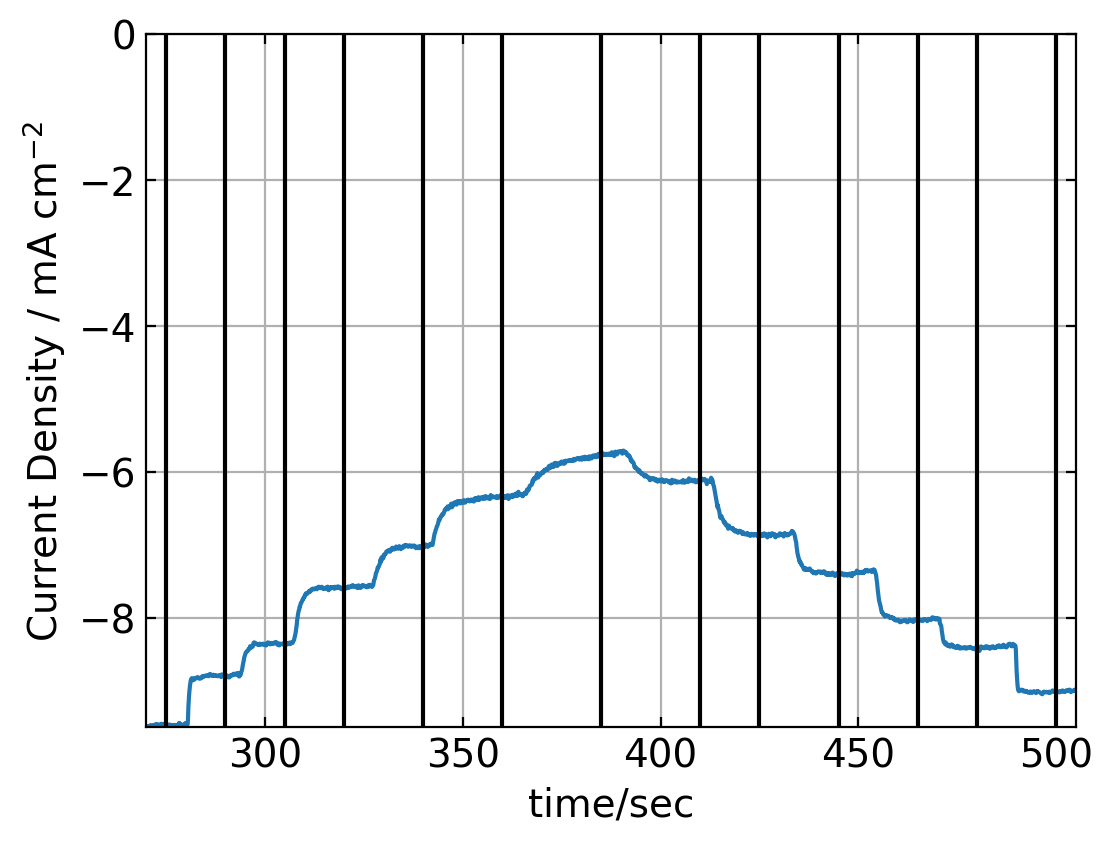

In [14]:
for df in ZnPVAGA_ECH_08[0:1]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    xlim(270,505)
    ylim(-9.5,0)
    
grid()    

x_list = [275,290,305,320,340,360,385,410,425,445,465,480,500]
for i in x_list:
    axvline(x=i,color='black')

show() 

time_ZPG08_1 = [275,290,305,320,340,360,385,410,425,445,465,480,500]
I_ZPG08_1 = []
for i in arange(13):
    icd = ZnPVAGA_ECH_08[0]['icd'][ZnPVAGA_ECH_08[0]['time/s'] < time_ZPG08_1[i]][-1:]
    I_ZPG08_1.extend(-1/icd)

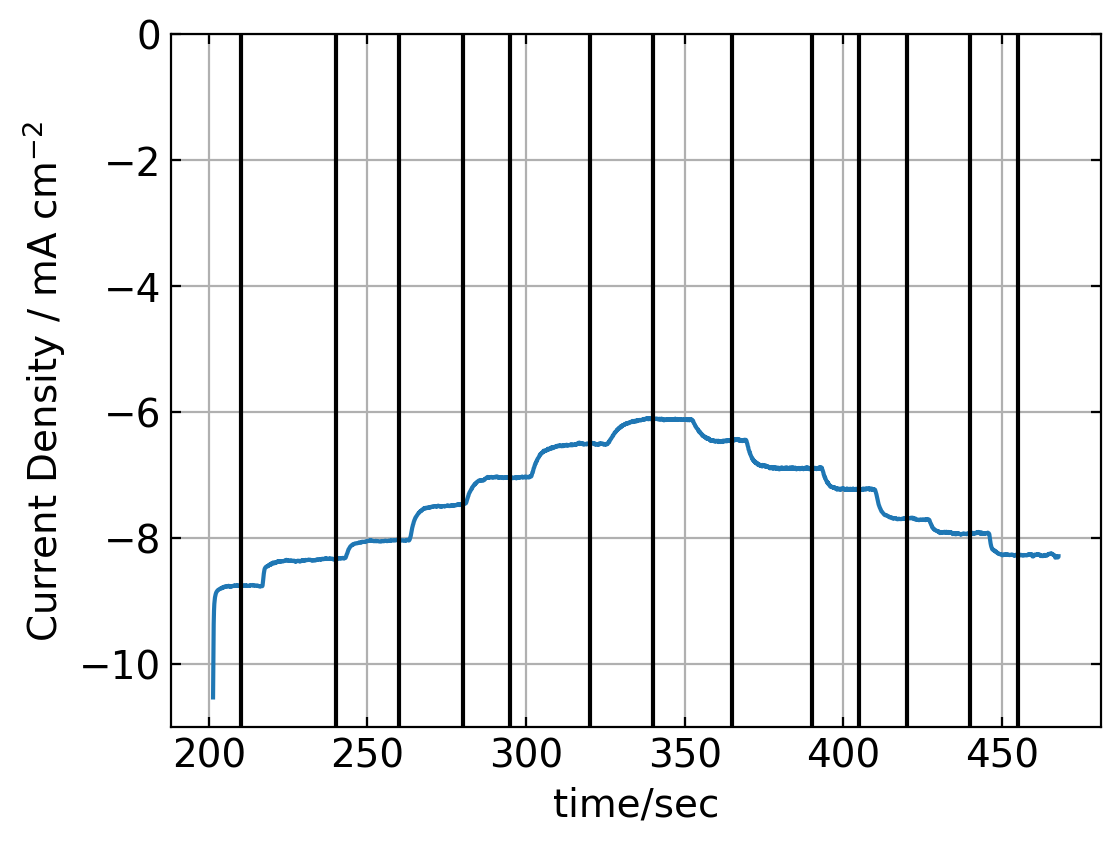

In [15]:
for df in ZnPVAGA_ECH_08[1:2]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-11,0)
    #xlim(260,520)
grid()    

x_list = [210,240,260,280,295,320,340,365,390,405,420,440,455]
for i in x_list:
    axvline(x=i,color='black')

show() 

time_ZPG08_2 = [210,240,260,280,295,320,340,365,390,405,420,440,455]
I_ZPG08_2 = []
for i in arange(13):
    icd = ZnPVAGA_ECH_08[1]['icd'][ZnPVAGA_ECH_08[1]['time/s'] < time_ZPG08_2[i]][-1:]
    I_ZPG08_2.extend(-1/icd)

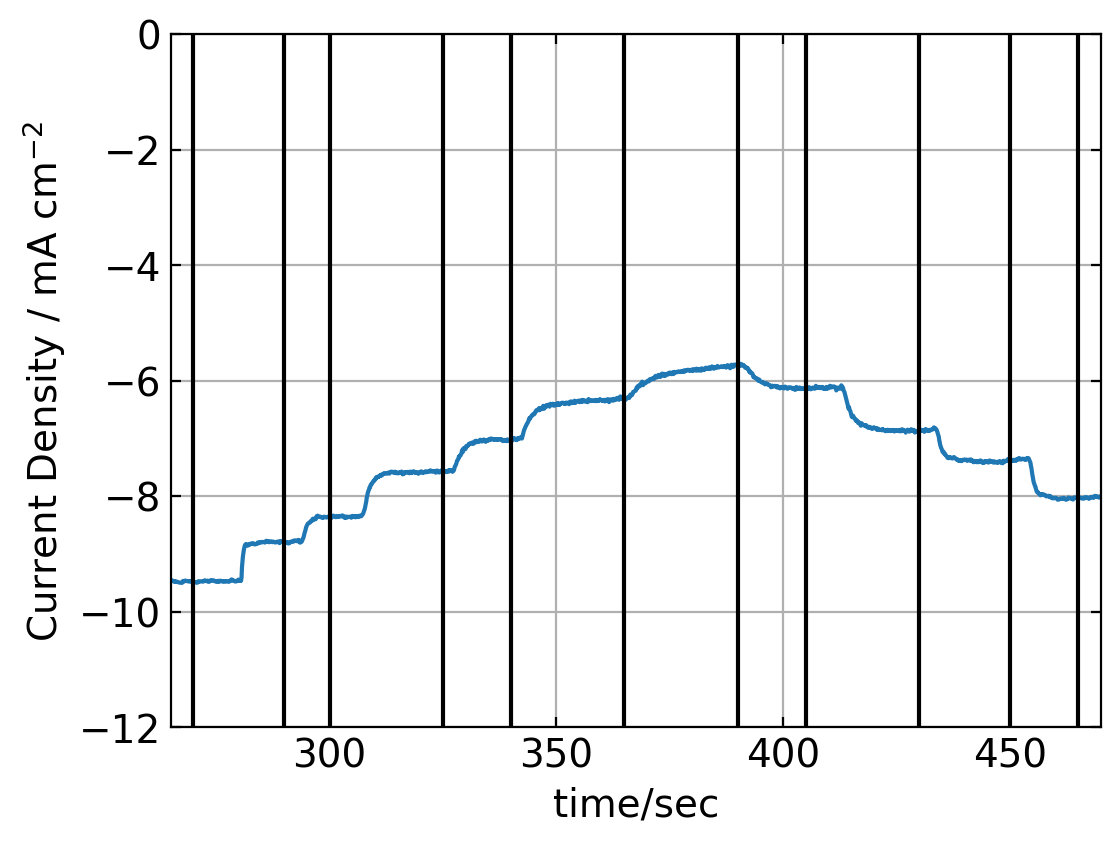

In [16]:
for df in ZnPVAGA_ECH_08[2:3]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-12,0)
    xlim(265,470)
grid()    

x_list = [270,290,300,325,340,365,390,405,430,450,465,480,505]
for i in x_list:
    axvline(x=i,color='black')

show() 

time_ZPG08_3 = [270,290,300,325,340,365,390,405,430,450,465,480,505]
I_ZPG08_3 = []
for i in arange(13):
    icd = ZnPVAGA_ECH_08[2]['icd'][ZnPVAGA_ECH_08[2]['time/s'] < time_ZPG08_3[i]][-1:]
    I_ZPG08_3.extend(-1/icd)

In [17]:
ZnPVAGA_08_1600 = [I_ZPG08_2[0],I_ZPG08_2[12],I_ZPG08_3[0],I_ZPG08_3[12],I_ZPG08_1[0],I_ZPG08_1[12]]
ZnPVAGA_08_900 = [I_ZPG08_2[1],I_ZPG08_2[11],I_ZPG08_3[1],I_ZPG08_3[11],I_ZPG08_1[1],I_ZPG08_1[11]]        
ZnPVAGA_08_625 = [I_ZPG08_2[2],I_ZPG08_2[10],I_ZPG08_3[2],I_ZPG08_3[10],I_ZPG08_1[2],I_ZPG08_1[10]]
ZnPVAGA_08_330 = [I_ZPG08_2[3],I_ZPG08_2[9],I_ZPG08_3[3],I_ZPG08_3[9],I_ZPG08_1[3],I_ZPG08_1[9]]
ZnPVAGA_08_220 = [I_ZPG08_2[4],I_ZPG08_2[8],I_ZPG08_3[4],I_ZPG08_3[8],I_ZPG08_1[4],I_ZPG08_1[8]]
ZnPVAGA_08_140 = [I_ZPG08_2[5],I_ZPG08_2[7],I_ZPG08_3[5],I_ZPG08_3[7],I_ZPG08_1[5],I_ZPG08_1[7]]
ZnPVAGA_08_100 = [I_ZPG08_1[6],I_ZPG08_1[6],I_ZPG08_3[6]]

avg_I_ZnPVAGA_08 = [mean(ZnPVAGA_08_1600),mean(ZnPVAGA_08_900),mean(ZnPVAGA_08_625),mean(ZnPVAGA_08_330),mean(ZnPVAGA_08_220),mean(ZnPVAGA_08_140),mean(ZnPVAGA_08_100)]

### Zn PVA GA at -0.9V/RHE

In [18]:
order = array([1,2,3])
ZnPVAGA_ECHlist_09 = [f'ZnPVAGAECH_09 RDE {i} ECH 1600 rpm K-L.mpt' for i in order]        
ZnPVAGA_ECH_09 = [ec.read_mpt(f)for f in ZnPVAGA_ECHlist_09]

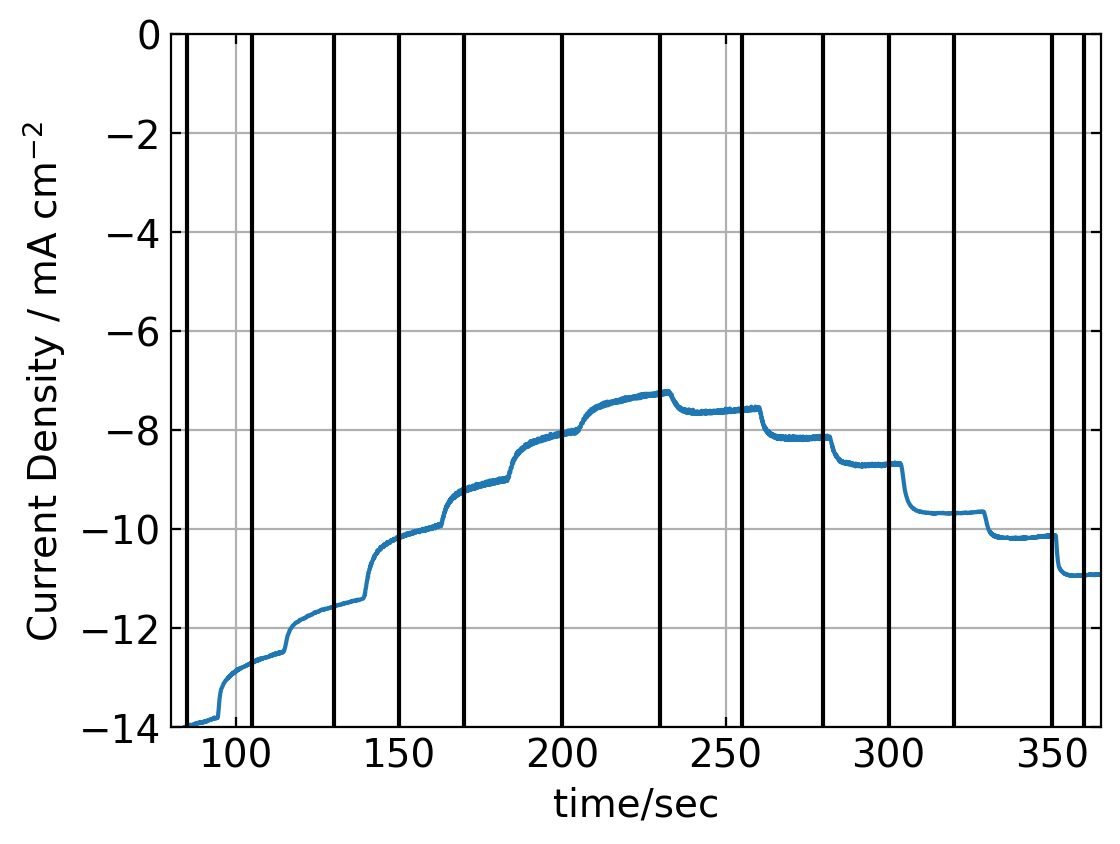

In [19]:
for df in ZnPVAGA_ECH_09[0:1]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-14,0)
    xlim(80,365)
    
grid()    

x_list = [85,105,130,150,170,200,230,255,280,300,320,350,360]
for i in x_list:
    axvline(x=i,color='black')
show() 

time_ZPG09_1 = [85,105,130,150,170,200,230,255,280,300,320,350,360]
I_ZPG09_1 = []
for i in arange(13):
    icd = ZnPVAGA_ECH_09[0]['icd'][ZnPVAGA_ECH_09[0]['time/s'] < time_ZPG09_1[i]][-1:]
    I_ZPG09_1.extend(-1/icd)

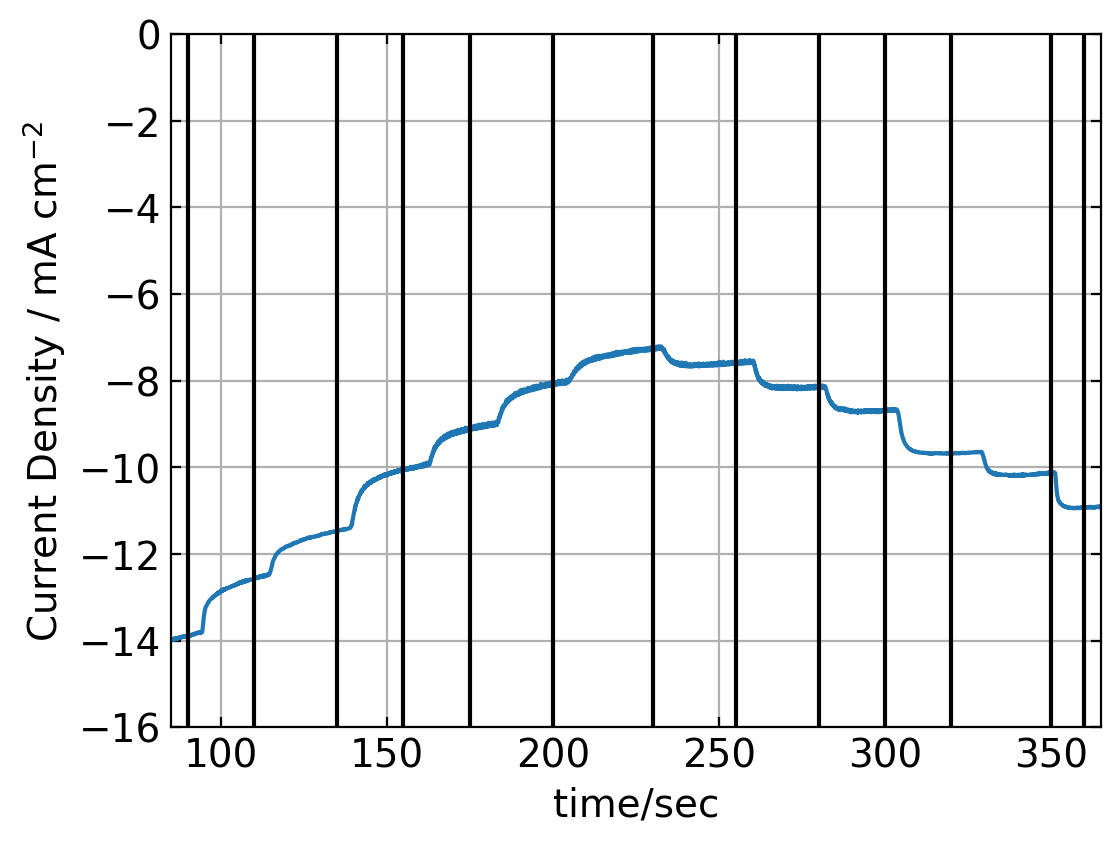

In [20]:
for df in ZnPVAGA_ECH_09[1:2]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-16,0)
    xlim(85,365)
grid()    

x_list = [90,110,135,155,175,200,230,255,280,300,320,350,360]
for i in x_list:
    axvline(x=i,color='black')


show() 

time_ZPG09_2 = [90,110,135,155,175,200,230,255,280,300,320,350,360]
I_ZPG09_2 = []
for i in arange(13):
    icd = ZnPVAGA_ECH_09[1]['icd'][ZnPVAGA_ECH_09[1]['time/s'] < time_ZPG09_2[i]][-1:]
    I_ZPG09_2.extend(-1/icd)

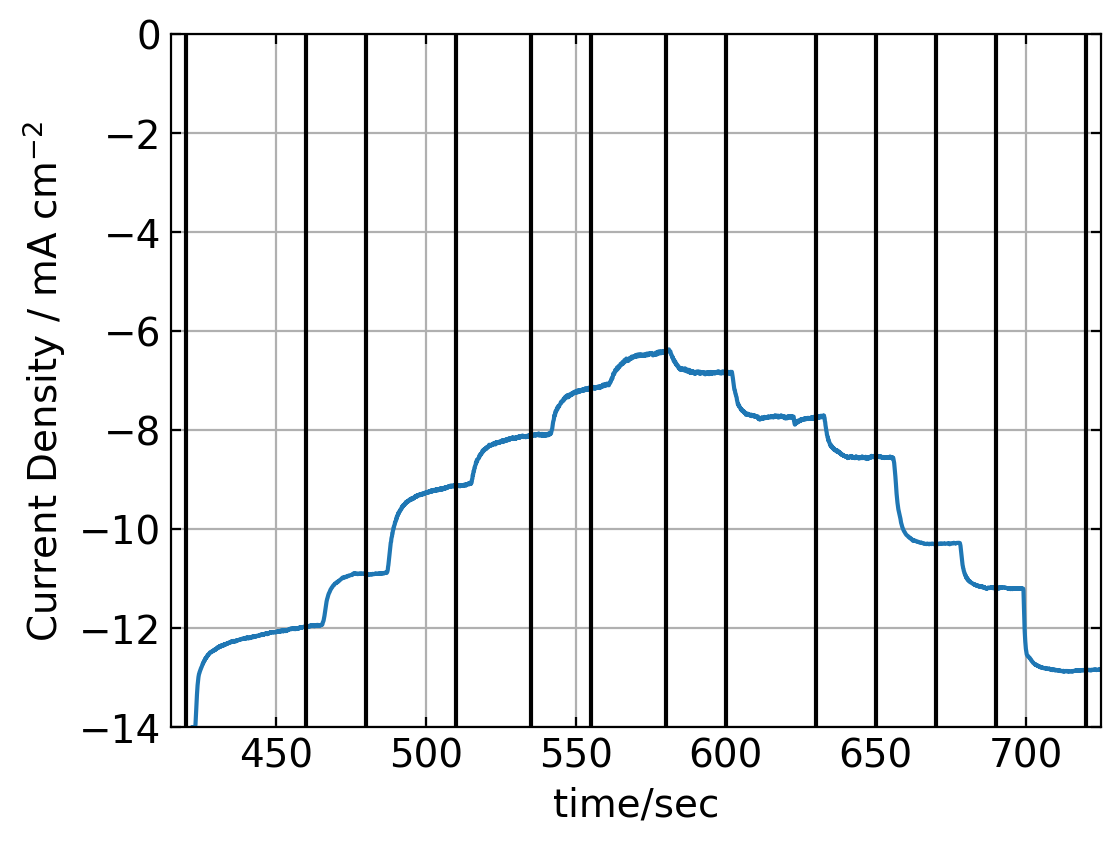

In [22]:
for df in ZnPVAGA_ECH_09[2:3]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-14,0)
    xlim(415,725)
    
grid()    
x_list = [420,460,480,510,535,555,580,600,630,650,670,690,720]
for i in x_list:
    axvline(x=i,color='black')


show() 

time_ZPG09_3 = [420,460,480,510,535,555,580,600,630,650,670,690,720]
I_ZPG09_3 = []
for i in arange(13):
    icd = ZnPVAGA_ECH_09[2]['icd'][ZnPVAGA_ECH_09[2]['time/s'] < time_ZPG09_3[i]][-1:]
    I_ZPG09_3.extend(-1/icd)

In [23]:
ZnPVAGA_09_1600 = [I_ZPG09_2[0],I_ZPG09_2[12],I_ZPG09_3[0],I_ZPG09_3[12],I_ZPG09_1[0],I_ZPG09_1[12]]
ZnPVAGA_09_900 = [I_ZPG09_2[1],I_ZPG09_2[11],I_ZPG09_3[1],I_ZPG09_3[11],I_ZPG09_1[1],I_ZPG09_1[11]]        
ZnPVAGA_09_625 = [I_ZPG09_2[2],I_ZPG09_2[10],I_ZPG09_3[2],I_ZPG09_3[10],I_ZPG09_1[2],I_ZPG09_1[10]]
ZnPVAGA_09_330 = [I_ZPG09_2[3],I_ZPG09_2[9],I_ZPG09_3[3],I_ZPG09_3[9],I_ZPG09_1[3],I_ZPG09_1[9]]
ZnPVAGA_09_220 = [I_ZPG09_2[4],I_ZPG09_2[8],I_ZPG09_3[4],I_ZPG09_3[8],I_ZPG09_1[4],I_ZPG09_1[8]]
ZnPVAGA_09_140 = [I_ZPG09_2[5],I_ZPG09_2[7],I_ZPG09_3[5],I_ZPG09_3[7],I_ZPG09_1[5],I_ZPG09_1[7]]
ZnPVAGA_09_100 = [I_ZPG09_1[6],I_ZPG09_2[6],I_ZPG09_2[6]]

avg_I_ZnPVAGA_09 = [mean(ZnPVAGA_09_1600),mean(ZnPVAGA_09_900),mean(ZnPVAGA_09_625),mean(ZnPVAGA_09_330),mean(ZnPVAGA_09_220),mean(ZnPVAGA_09_140),mean(ZnPVAGA_09_100)]

### Zn PVA GA at -1V/RHE 

In [24]:
order = array([1,2,3])
ZnPVAGA_ECHlist_1 = [f'ZnPVAGAECH_1 RDE {i} ECH 1600 rpm K-L.mpt' for i in order]        
ZnPVAGA_ECH_1 = [ec.read_mpt(f)for f in ZnPVAGA_ECHlist_1]

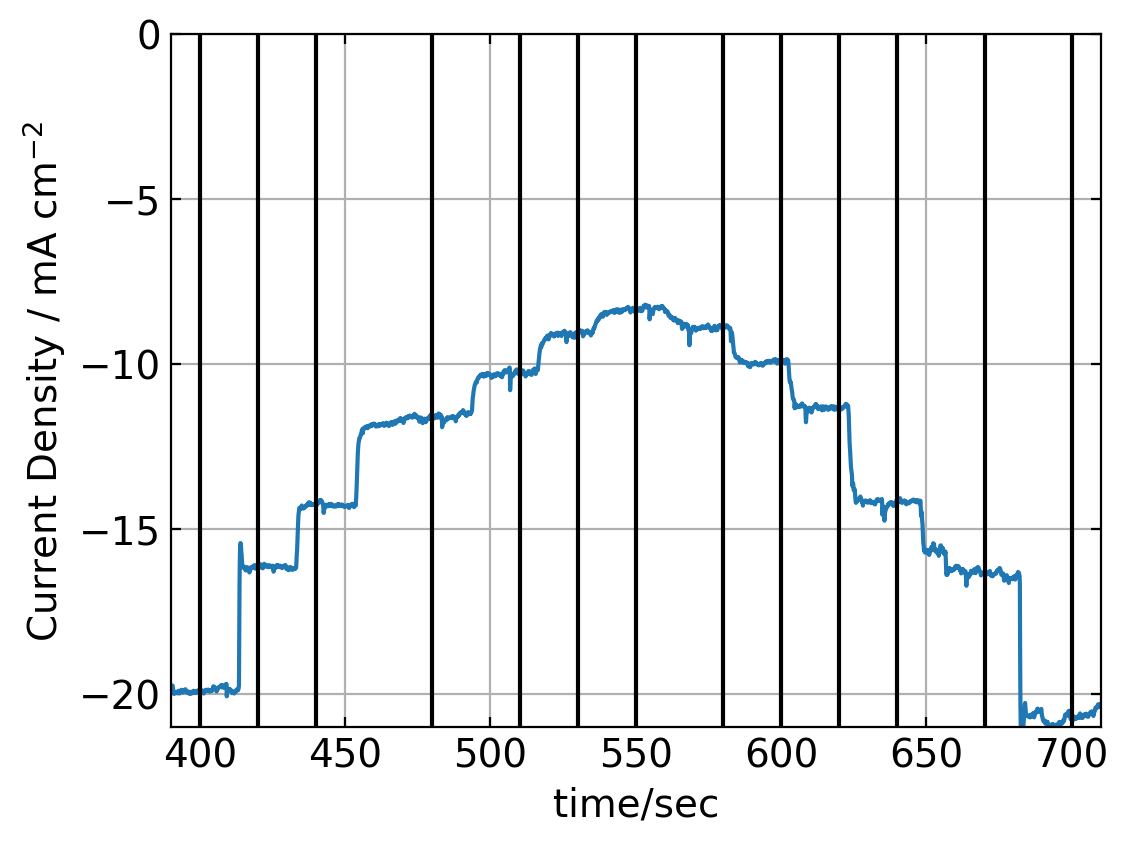

In [25]:
for df in ZnPVAGA_ECH_1[0:1]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-21,0)
    xlim(390,710)
    
grid()    

x_list = [400,420,440,480,510,530,550,580,600,620,640,670,700]
for i in x_list:
    axvline(x=i,color='black')

show() 

time_ZPG1_1 = [400,420,440,480,510,530,550,580,600,620,640,670,700]
I_ZPG1_1 = []
for i in arange(13):
    icd = ZnPVAGA_ECH_1[0]['icd'][ZnPVAGA_ECH_1[0]['time/s'] < time_ZPG1_1[i]][-1:]
    I_ZPG1_1.extend(-1/icd)

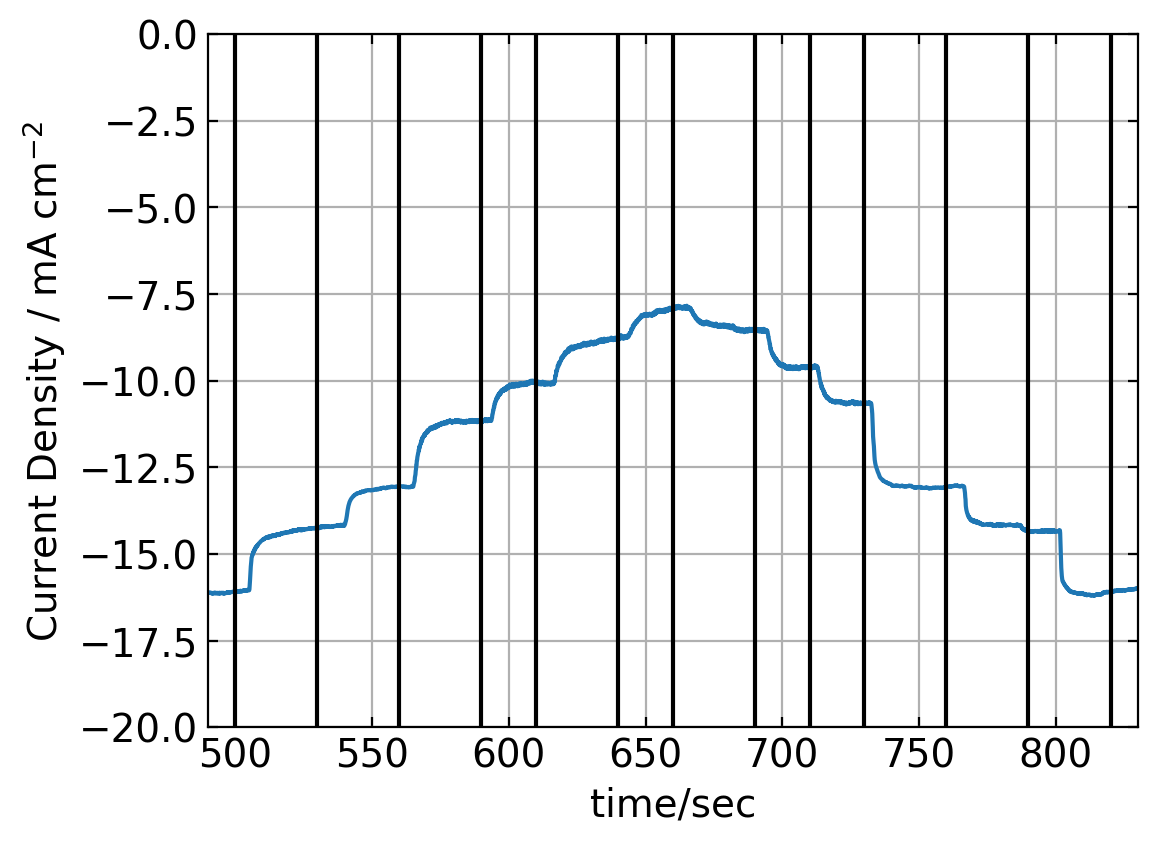

In [26]:
for df in ZnPVAGA_ECH_1[1:2]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-20,0)
    xlim(490,830)
    
grid()    

x_list = [500,530,560,590,610,640,660,690,710,730,760,790,820]
for i in x_list:
    axvline(x=i,color='black')

show() 

time_ZPG1_2 = [500,530,560,590,610,640,660,690,710,730,760,790,820]
I_ZPG1_2 = []
for i in arange(13):
    icd = ZnPVAGA_ECH_1[1]['icd'][ZnPVAGA_ECH_1[1]['time/s'] < time_ZPG1_2[i]][-1:]
    I_ZPG1_2.extend(-1/icd)

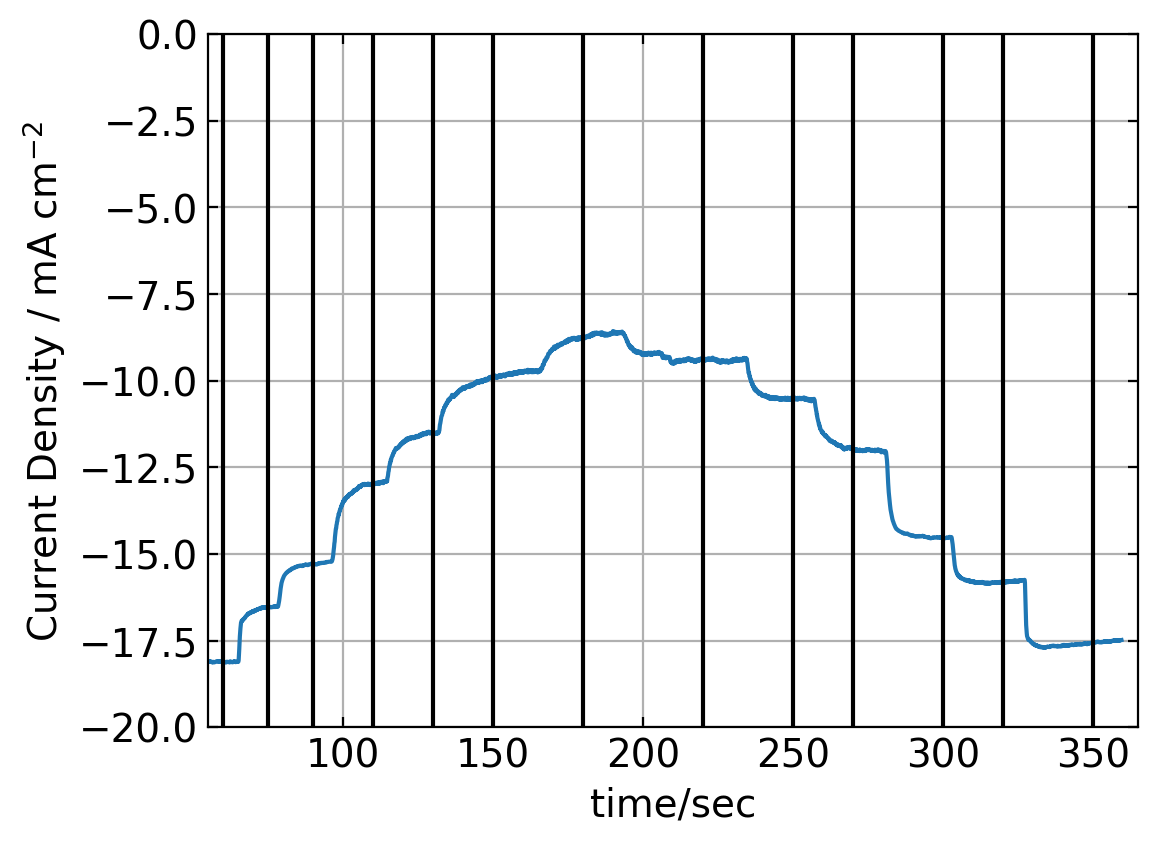

In [27]:
for df in ZnPVAGA_ECH_1[2:3]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-20,0)
    xlim(55,365)
grid()    

x_list = [60,75,90,110,130,150,180,220,250,270,300,320,350]
for i in x_list:
    axvline(x=i,color='black')

show() 

time_ZPG1_3 = [60,75,90,110,130,150,180,220,250,270,300,320,350]
I_ZPG1_3 = []
for i in arange(13):
    icd = ZnPVAGA_ECH_1[2]['icd'][ZnPVAGA_ECH_1[2]['time/s'] < time_ZPG1_3[i]][-1:]
    I_ZPG1_3.extend(-1/icd)

In [28]:
ZnPVAGA_1_1600 = [I_ZPG1_2[0],I_ZPG1_2[12],I_ZPG1_3[0],I_ZPG1_3[12],I_ZPG1_1[0],I_ZPG1_1[12]]
ZnPVAGA_1_900 = [I_ZPG1_2[1],I_ZPG1_2[11],I_ZPG1_3[1],I_ZPG1_3[11],I_ZPG1_1[1],I_ZPG1_1[11]]        
ZnPVAGA_1_625 = [I_ZPG1_2[2],I_ZPG1_2[10],I_ZPG1_3[2],I_ZPG1_3[10],I_ZPG1_1[2],I_ZPG1_1[10]]
ZnPVAGA_1_330 = [I_ZPG1_2[3],I_ZPG1_2[9],I_ZPG1_3[3],I_ZPG1_3[9],I_ZPG1_1[3],I_ZPG1_1[9]]
ZnPVAGA_1_220 = [I_ZPG1_2[4],I_ZPG1_2[8],I_ZPG1_3[4],I_ZPG1_3[8],I_ZPG1_1[4],I_ZPG1_1[8]]
ZnPVAGA_1_140 = [I_ZPG1_2[5],I_ZPG1_2[7],I_ZPG1_3[5],I_ZPG1_3[7],I_ZPG1_1[5],I_ZPG1_1[7]]
ZnPVAGA_1_100 = [I_ZPG1_2[6],I_ZPG1_3[6],I_ZPG1_2[6]]

avg_I_ZnPVAGA_1 = [mean(ZnPVAGA_1_1600),mean(ZnPVAGA_1_900),mean(ZnPVAGA_1_625),mean(ZnPVAGA_1_330),mean(ZnPVAGA_1_220),mean(ZnPVAGA_1_140),mean(ZnPVAGA_1_100)]

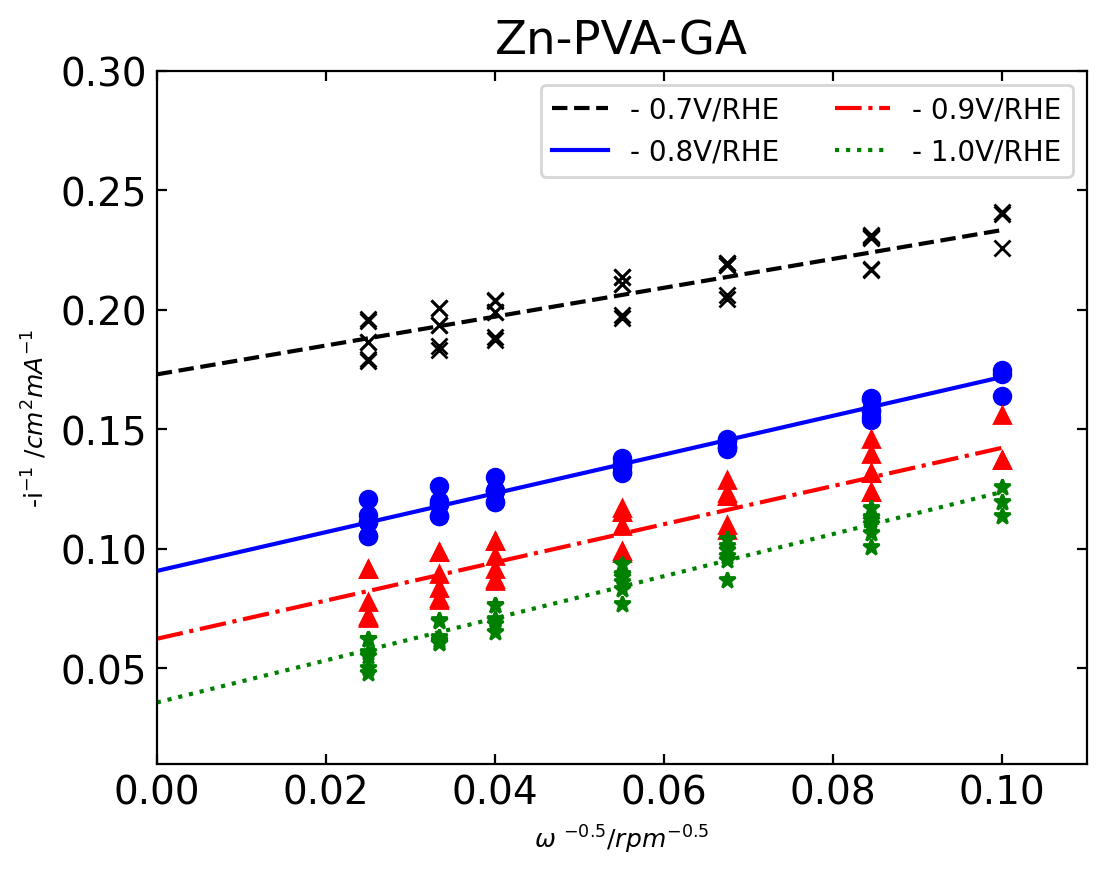

In [29]:
X = linspace(0,0.1,20)

popt, pcov = curve_fit(line,1/sqrt(rpm_avg),avg_I_ZnPVAGA_07)
y_07_1_G = popt[0]
y_07_2_G = popt[1]
y_07_c_G = pcov

plot(X ,line(X,y_07_1_G,y_07_2_G),'k--')


popt, pcov = curve_fit(line,1/sqrt(rpm_avg),avg_I_ZnPVAGA_08)
y_08_1_G = popt[0]
y_08_2_G = popt[1]
y_08_c_G = pcov

plot(X ,line(X,y_08_1_G,y_08_2_G),'b-')

popt, pcov = curve_fit(line,1/sqrt(rpm_avg),avg_I_ZnPVAGA_09)
y_09_1_G = popt[0]
y_09_2_G = popt[1]
y_09_c_G = pcov

plot(X ,line(X,y_09_1_G,y_09_2_G),'r-.')

popt, pcov = curve_fit(line,1/sqrt(rpm_avg),avg_I_ZnPVAGA_1)
y_1_1_G = popt[0]
y_1_2_G = popt[1]
y_1_c_G = pcov
plot(X ,line(X,y_1_1_G,y_1_2_G),'g:')

ylim(0.01,0.3)
xlim(0,0.11)


X = linspace(0,0.1,20)

plot(1/sqrt(rpm), I_ZPG07_1,'x',color = 'black')
plot(1/sqrt(rpm), I_ZPG07_2,'x',color = 'black')
plot(1/sqrt(rpm), I_ZPG07_3,'x',color = 'black')

plot(1/sqrt(rpm), I_ZPG08_1,'o',color = 'blue')
plot(1/sqrt(rpm), I_ZPG08_2,'o',color = 'blue')
plot(1/sqrt(rpm), I_ZPG08_3,'o',color = 'blue')

plot(1/sqrt(rpm), I_ZPG09_1,'^',color = 'red')
plot(1/sqrt(rpm), I_ZPG09_2,'^',color = 'red')
plot(1/sqrt(rpm), I_ZPG09_3,'^',color = 'red')


plot(1/sqrt(rpm), I_ZPG1_1,'*',color = 'green')
plot(1/sqrt(rpm), I_ZPG1_2,'*',color = 'green')
plot(1/sqrt(rpm), I_ZPG1_3,'*',color = 'green')


xlabel('${\omega\ }^{-0.5} / {rpm}^{-0.5}$',fontsize=9)
ylabel('-i$^{-1}$ /$cm^{2}mA^{-1}}$',fontsize=9)

title("Zn-PVA-GA")
legend(['- 0.7V/RHE','- 0.8V/RHE','- 0.9V/RHE','- 1.0V/RHE'],ncol=2, prop={'size':10})
savefig("average K-L ZnPVAGA ECH.png", dpi = 300)

show()

In [30]:
print(1/(y_07_2_G+sqrt(diag(y_07_c_G))[1]))
print(1/(y_07_2_G-sqrt(diag(y_07_c_G))[1]))

print(1/(y_08_2_G+sqrt(diag(y_08_c_G))[1]))
print(1/(y_08_2_G-sqrt(diag(y_08_c_G))[1]))

print(1/(y_09_2_G+sqrt(diag(y_09_c_G))[1]))
print(1/(y_09_2_G-sqrt(diag(y_09_c_G))[1]))

print(1/(y_1_2_G+sqrt(diag(y_1_c_G))[1]))
print(1/(y_1_2_G-sqrt(diag(y_1_c_G))[1]))

5.730142392357239
5.829617080644878
10.871580571193137
11.165200340843922
15.244705663391523
16.90324629096491
26.68099594079738
29.4544050161679


In [31]:
l_07_G =  1/(y_07_2_G+sqrt(diag(y_07_c_G))[1])
u_07_G = 1/(y_07_2_G-sqrt(diag(y_07_c_G))[1])

l_08_G = 1/(y_08_2_G+sqrt(diag(y_08_c_G))[1])
u_08_G = 1/(y_08_2_G-sqrt(diag(y_08_c_G))[1])

l_09_G = 1/(y_09_2_G+sqrt(diag(y_09_c_G))[1])
u_09_G = 1/(y_09_2_G-sqrt(diag(y_09_c_G))[1])

l_1_G = 1/(y_1_2_G+sqrt(diag(y_1_c_G))[1])
u_1_G = 1/(y_1_2_G-sqrt(diag(y_1_c_G))[1])

In [95]:
print(f'ik at -0.7V/RHE =  {-(1/y_07_2_G):.2f} ± {((u_07_G-l_07_G)/2):.2f} mA/cm2') 
print(f'ik at -0.8V/RHE =  {-(1/y_08_2_G):.2f} ± {((u_08_G-l_08_G)/2):.2f} mA/cm2') 
print(f'ik at -0.9V/RHE =  {-(1/y_09_2_G):.2f} ± {((u_09_G-l_09_G)/2):.2f} mA/cm2') 
print(f'ik at -1.0V/RHE =  {-(1/y_1_2_G):.2f} ± {((u_1_G-l_1_G)/2):.2f} mA/cm2' ) 

ik at -0.7V/RHE =  -5.78 ± 0.05 mA/cm2
ik at -0.8V/RHE =  -11.02 ± 0.15 mA/cm2
ik at -0.9V/RHE =  -16.03 ± 0.83 mA/cm2
ik at -1.0V/RHE =  -28.00 ± 1.39 mA/cm2


sqrt(0.0166) is for conversion of rpm to rad/s

In [33]:
n07_G = 1/ (0.62 * F * D**(2/3) * v**(-1/6) * C * y_07_1_G * sqrt(0.0166))
n08_G = 1/ (0.62 * F * D**(2/3) * v**(-1/6) * C * y_08_1_G * sqrt(0.0166))
n09_G = 1/ (0.62 * F * D**(2/3) * v**(-1/6) * C * y_09_1_G * sqrt(0.0166))
n1_G  =1/ (0.62 * F * D**(2/3) * v**(-1/6) * C * y_1_1_G * sqrt(0.0166))

In [34]:
print(n07_G,n08_G,n09_G,n1_G)

2.02025796611681 1.5035168989286183 1.5268030542722264 1.3848031954999214


In [35]:
n_ZPG = [n07_G,n08_G,n09_G,n1_G]
m_ZPG=[y_07_1_G,y_08_1_G,y_09_1_G,y_1_1_G]
dndm_ZPG = n_ZPG/array(m_ZPG)
wm_ZPG = [sqrt(diag(y_07_c_G))[0],sqrt(diag(y_08_c_G))[0],sqrt(diag(y_09_c_G))[0],sqrt(diag(y_1_c_G))[0]]
wn_ZPG = dndm_ZPG * wm_ZPG

### Number of electrons transferred at each potentials

In [96]:
print(f'n at -0.7V/RHE =  {n07_G:.2f} ± {wn_ZPG[0]:.2f}') 
print(f'n at -0.8V/RHE =  {n08_G:.2f} ± {wn_ZPG[1]:.2f}') 
print(f'n at -0.9V/RHE =  {n09_G:.2f} ± {wn_ZPG[2]:.2f}')  
print(f'n at -1.0V/RHE =  {n1_G:.2f} ± {wn_ZPG[3]:.2f}')   

n at -0.7V/RHE =  2.02 ± 0.08
n at -0.8V/RHE =  1.50 ± 0.04
n at -0.9V/RHE =  1.53 ± 0.10
n at -1.0V/RHE =  1.38 ± 0.04


### Zn PVA at -0.7V/RHE

In [37]:
order = array([1,2,3])
ZnPVA_ECHlist_07 = [f'ZnPVAECH_07 RDE {i} ECH 1600 rpm K-L.mpt' for i in order]        
ZnPVA_ECH_07 = [ec.read_mpt(f)for f in ZnPVA_ECHlist_07]

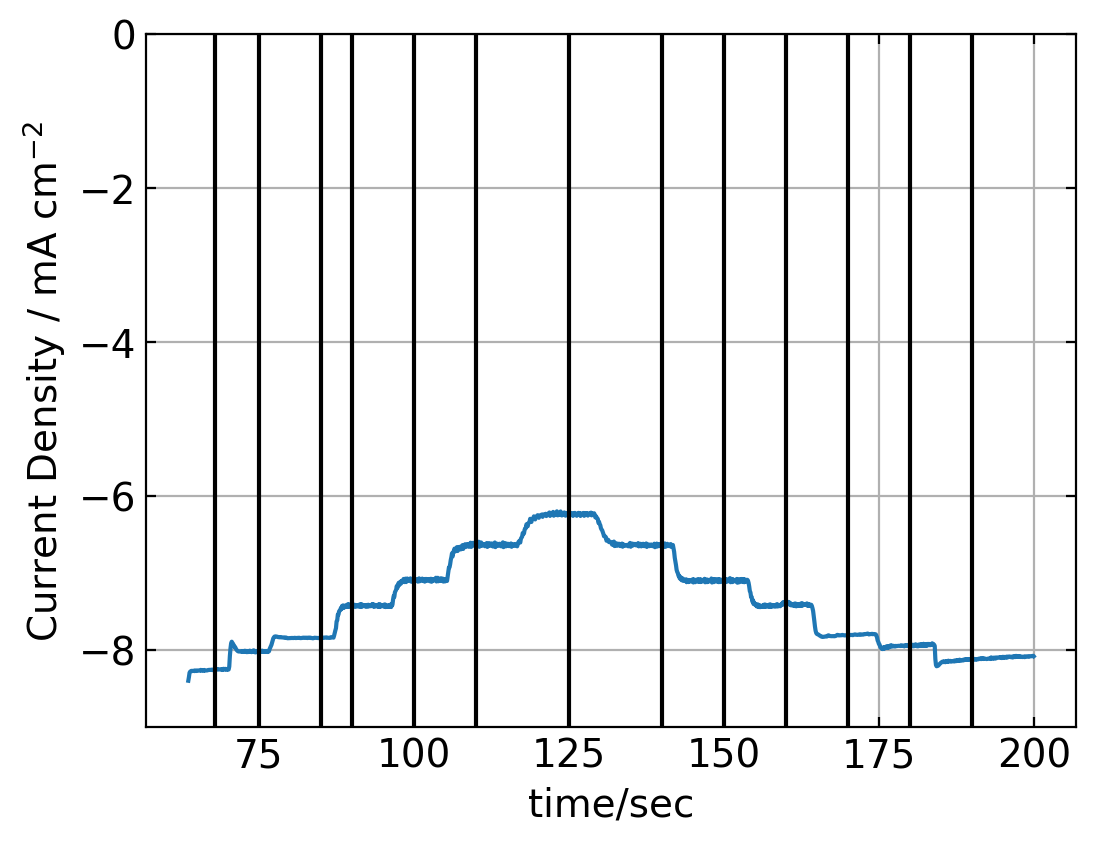

In [38]:
for df in ZnPVA_ECH_07[0:1]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-9,0)
    
grid()    

x_list = [68,75,85,90,100,110,125,140,150,160,170,180,190]
for i in x_list:
    axvline(x=i,color='black')
show() 

time_ZP07_1 = [68,75,85,90,100,110,125,140,150,160,170,180,190]
I_ZP07_1 = []
for i in arange(13):
    icd = ZnPVA_ECH_07[0]['icd'][ZnPVA_ECH_07[0]['time/s'] < time_ZP07_1[i]][-1:]
    I_ZP07_1.extend(-1/icd)

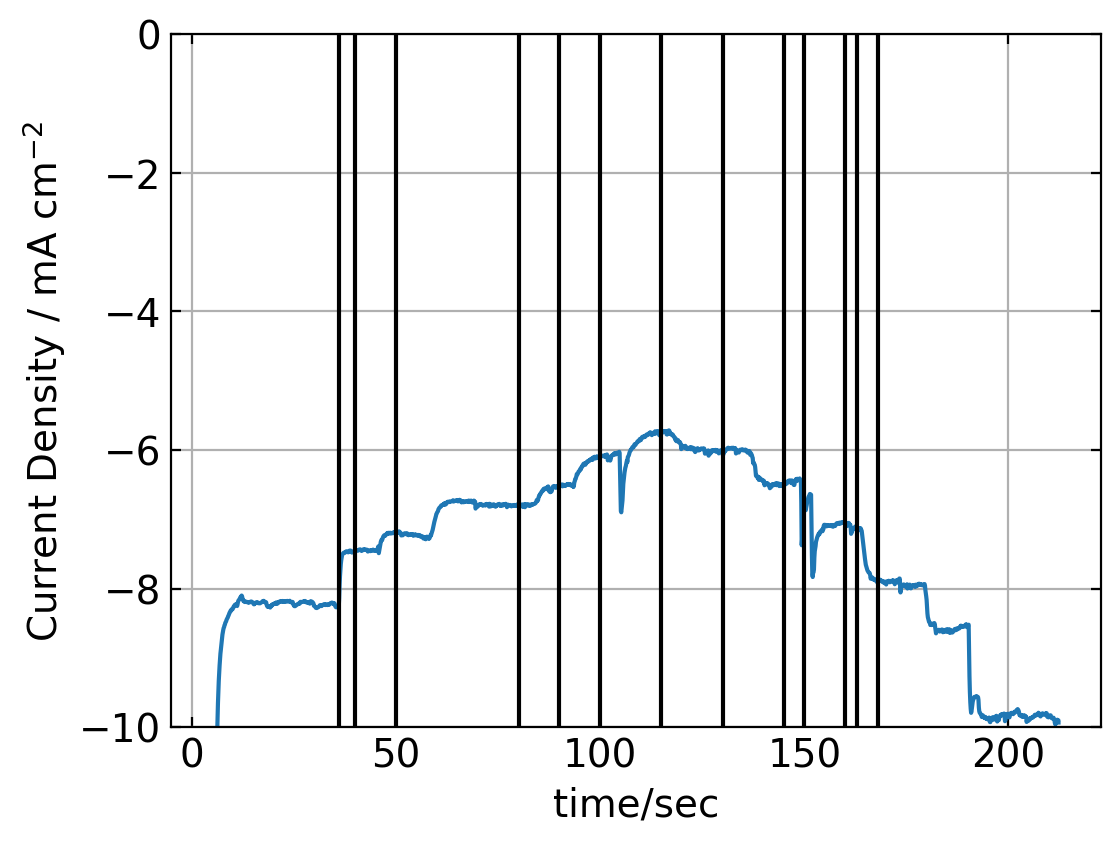

In [39]:
for df in ZnPVA_ECH_07[1:2]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-10,0)
    
grid()    

x_list = [36,40,50,80,90,100,115,130,145,150,160,163,168]
for i in x_list:
    axvline(x=i,color='black')

show() 

time_ZP07_2 = [36,40,50,80,90,100,115,130,145,150,160,163,168]
I_ZP07_2 = []
for i in arange(13):
    icd = ZnPVA_ECH_07[1]['icd'][ZnPVA_ECH_07[1]['time/s'] < time_ZP07_2[i]][-1:]
    I_ZP07_2.extend(-1/icd)

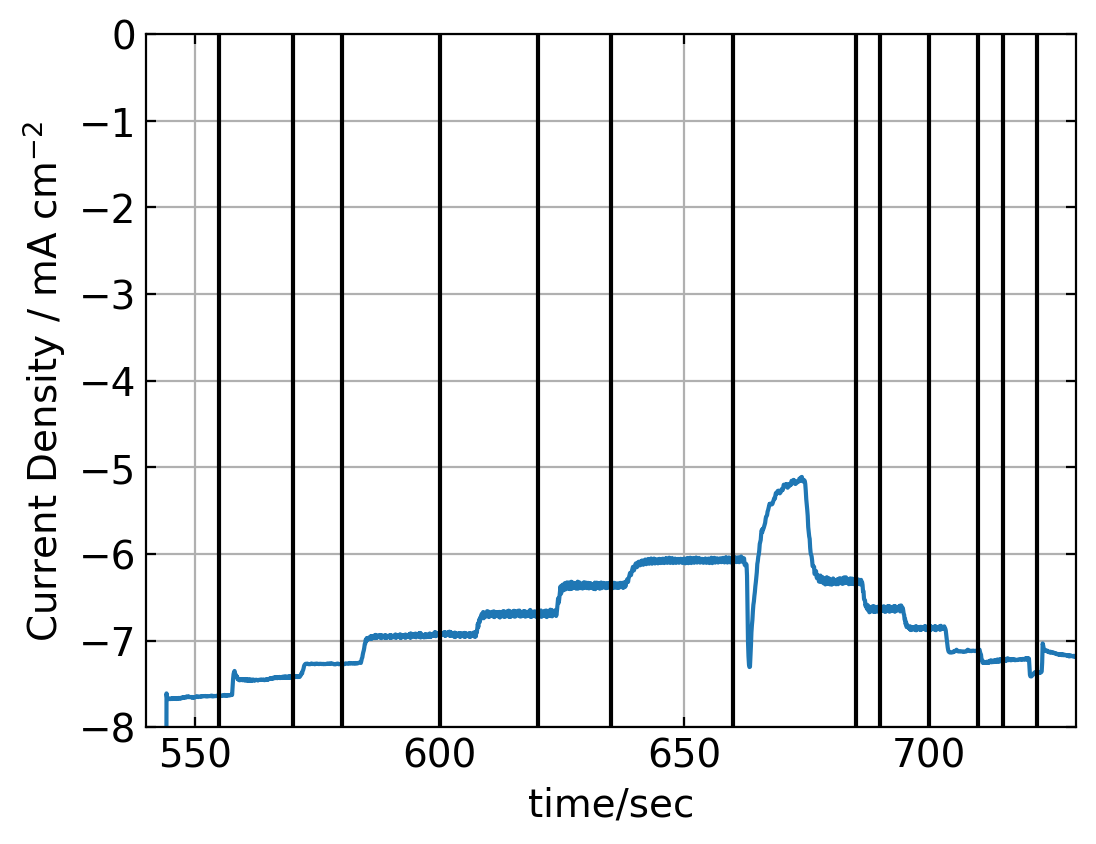

In [40]:
for df in ZnPVA_ECH_07[2:3]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-8,0)
    xlim(540,730)
    
grid()    

x_list = [555,570,580,600,620,635,660,685,690,700,710,715,722]
for i in x_list:
    axvline(x=i,color='black')


show() 

time_ZP07_3 = [555,570,580,600,620,635,660,685,690,700,710,715,722]
I_ZP07_3 = []
for i in arange(13):
    icd = ZnPVA_ECH_07[2]['icd'][ZnPVA_ECH_07[2]['time/s'] < time_ZP07_3[i]][-1:]
    I_ZP07_3.extend(-1/icd)

In [39]:
from scipy.optimize import curve_fit

def line(x,m,b):
    return m*x+b

rpm_avg = [1600,900,625,330,220,140,100]

In [56]:
ZnPVA_07_1600 = [I_ZP07_2[0],I_ZP07_2[12],I_ZP07_1[0],I_ZP07_1[12],I_ZP07_3[0],I_ZP07_3[12]]
ZnPVA_07_900 = [I_ZP07_2[1],I_ZP07_2[11],I_ZP07_1[1],I_ZP07_1[11],I_ZP07_3[1],I_ZP07_3[11]]
ZnPVA_07_625 = [I_ZP07_2[2],I_ZP07_2[10],I_ZP07_1[2],I_ZP07_1[10],I_ZP07_3[2],I_ZP07_3[10]]
ZnPVA_07_330 = [I_ZP07_2[3],I_ZP07_2[9],I_ZP07_1[3],I_ZP07_1[9],I_ZP07_3[3],I_ZP07_3[9]]
ZnPVA_07_220 = [I_ZP07_2[4],I_ZP07_2[8],I_ZP07_1[4],I_ZP07_1[8],I_ZP07_3[4],I_ZP07_3[8]]
ZnPVA_07_140 = [I_ZP07_2[5],I_ZP07_2[7],I_ZP07_1[5],I_ZP07_1[7],I_ZP07_3[5],I_ZP07_3[7]]
ZnPVA_07_100 = [I_ZP07_2[6],I_ZP07_1[6],I_ZP07_3[6]]

avg_I_ZnPVA_07 = [mean(ZnPVA_07_1600),mean(ZnPVA_07_900),mean(ZnPVA_07_625),mean(ZnPVA_07_330),mean(ZnPVA_07_220),mean(ZnPVA_07_140),mean(ZnPVA_07_100)]

### Zn PVA at -0.8V/RHE

In [57]:
order = array([1,2,3])
ZnPVA_ECHlist_08 = [f'ZnPVAECH_08 RDE {i} ECH 1600 rpm K-L.mpt' for i in order]        
ZnPVA_ECH_08 = [ec.read_mpt(f)for f in ZnPVA_ECHlist_08]

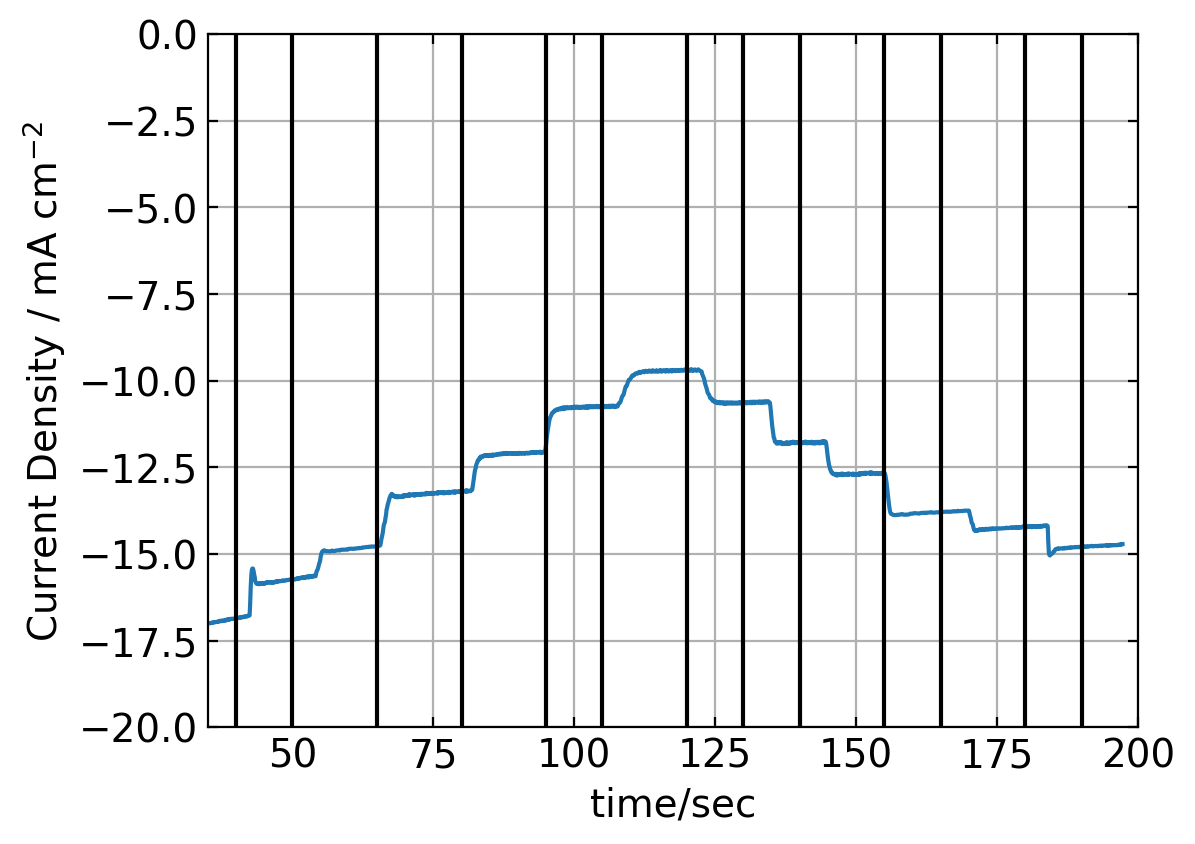

In [58]:
for df in ZnPVA_ECH_08[0:1]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-20,0)
    xlim(35,200)
    
grid()    

x_list = [40,50,65,80,95,105,120,130,140,155,165,180,190]
for i in x_list:
    axvline(x=i,color='black')

show() 

time_ZP08_1 = [40,50,65,80,95,105,120,130,140,155,165,180,190]
I_ZP08_1 = []
for i in arange(13):
    icd = ZnPVA_ECH_08[0]['icd'][ZnPVA_ECH_08[0]['time/s'] < time_ZP08_1[i]][-1:]
    I_ZP08_1.extend(-1/icd)

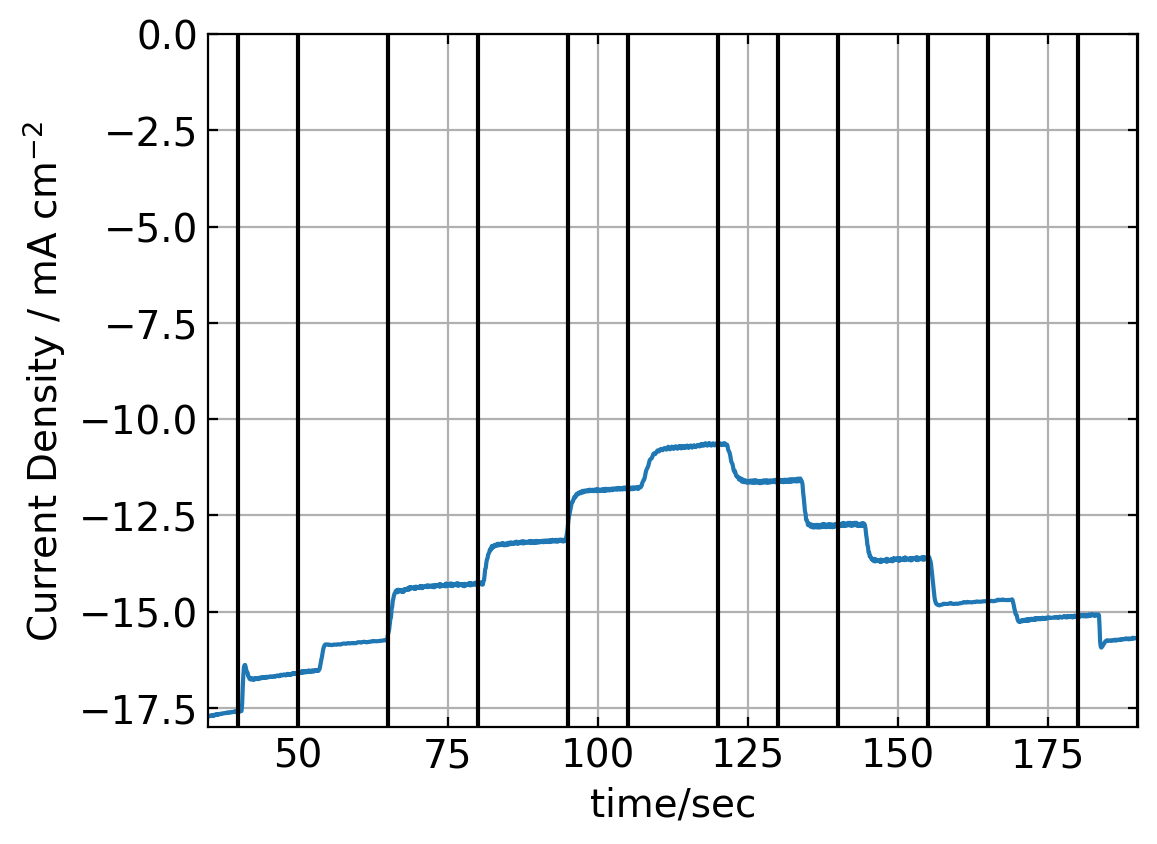

In [59]:
for df in ZnPVA_ECH_08[1:2]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-18,0)
    xlim(35,190)
    
grid()    

x_list = [40,50,65,80,95,105,120,130,140,155,165,180,190]
for i in x_list:
    axvline(x=i,color='black')
show() 

time_ZP08_2 = [40,50,65,80,95,105,120,130,140,155,165,180,190]
I_ZP08_2 = []
for i in arange(13):
    icd = ZnPVA_ECH_08[1]['icd'][ZnPVA_ECH_08[1]['time/s'] < time_ZP08_2[i]][-1:]
    I_ZP08_2.extend(-1/icd)

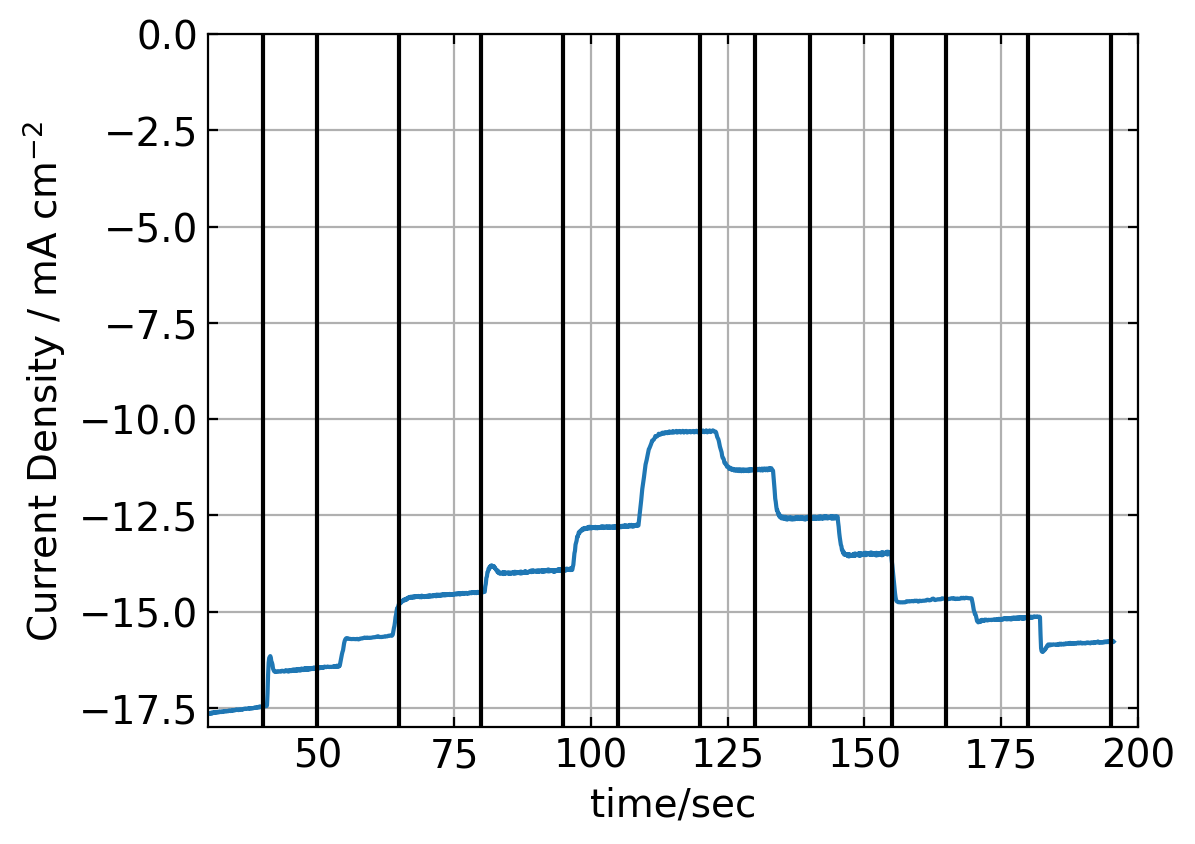

In [60]:
for df in ZnPVA_ECH_08[2:3]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-18,0)
    xlim(30,200)
    
grid()    

x_list = [40,50,65,80,95,105,120,130,140,155,165,180,195]
for i in x_list:
    axvline(x=i,color='black')

show() 

time_ZP08_3 = [40,50,65,80,95,105,120,130,140,155,165,180,195]
I_ZP08_3 = []
for i in arange(13):
    icd = ZnPVA_ECH_08[2]['icd'][ZnPVA_ECH_08[2]['time/s'] < time_ZP08_3[i]][-1:]
    I_ZP08_3.extend(-1/icd)

In [61]:
ZnPVA_08_1600 = [I_ZP08_1[0],I_ZP08_1[12],I_ZP08_2[0],I_ZP08_2[12],I_ZP08_3[0],I_ZP08_3[12]]
ZnPVA_08_900 = [I_ZP08_1[1],I_ZP08_1[11],I_ZP08_2[1],I_ZP08_2[11],I_ZP08_3[1],I_ZP08_3[11]]        
ZnPVA_08_625 = [I_ZP08_1[2],I_ZP08_1[10],I_ZP08_2[2],I_ZP08_2[10],I_ZP08_3[2],I_ZP08_3[10]]
ZnPVA_08_330 = [I_ZP08_1[3],I_ZP08_1[9],I_ZP08_2[3],I_ZP08_2[9],I_ZP08_3[3],I_ZP08_3[9]]
ZnPVA_08_220 = [I_ZP08_1[4],I_ZP08_1[8],I_ZP08_2[4],I_ZP08_2[8],I_ZP08_3[4],I_ZP08_3[8]]
ZnPVA_08_140 = [I_ZP08_1[5],I_ZP08_1[7],I_ZP08_2[5],I_ZP08_2[7],I_ZP08_3[5],I_ZP08_3[7]]
ZnPVA_08_100 = [I_ZP08_1[6],I_ZP08_3[6],I_ZP08_3[6]]

avg_I_ZnPVA_08 = [mean(ZnPVA_08_1600),mean(ZnPVA_08_900),mean(ZnPVA_08_625),mean(ZnPVA_08_330),mean(ZnPVA_08_220),mean(ZnPVA_08_140),mean(ZnPVA_08_100)]

### Zn PVA at -0.9V/RHE

In [62]:
order = array([1,2,3])
ZnPVA_ECHlist_09 = [f'ZnPVAECH_09 RDE {i} ECH 1600 rpm K-L.mpt' for i in order]        
ZnPVA_ECH_09 = [ec.read_mpt(f)for f in ZnPVA_ECHlist_09]

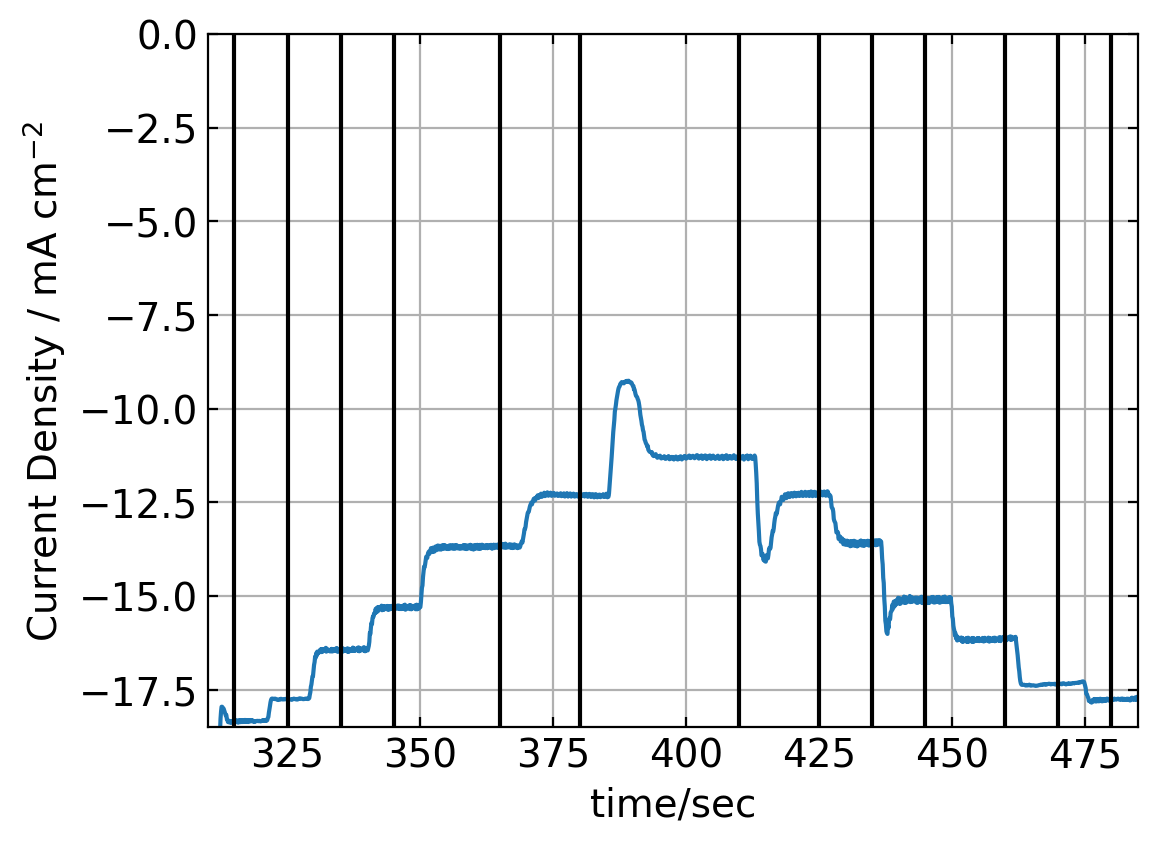

In [63]:
for df in ZnPVA_ECH_09[0:1]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-18.5,0)
    xlim(310,485)
    
grid()    

x_list = [315,325,335,345,365,380,410,425,435,445,460,470,480]
for i in x_list:
    axvline(x=i,color='black')


show() 

time_ZP09_1 = [315,325,335,345,365,380,410,425,435,445,460,470,480]
I_ZP09_1 = []
for i in arange(13):
    icd = ZnPVA_ECH_09[0]['icd'][ZnPVA_ECH_09[0]['time/s'] < time_ZP09_1[i]][-1:]
    I_ZP09_1.extend(-1/icd)

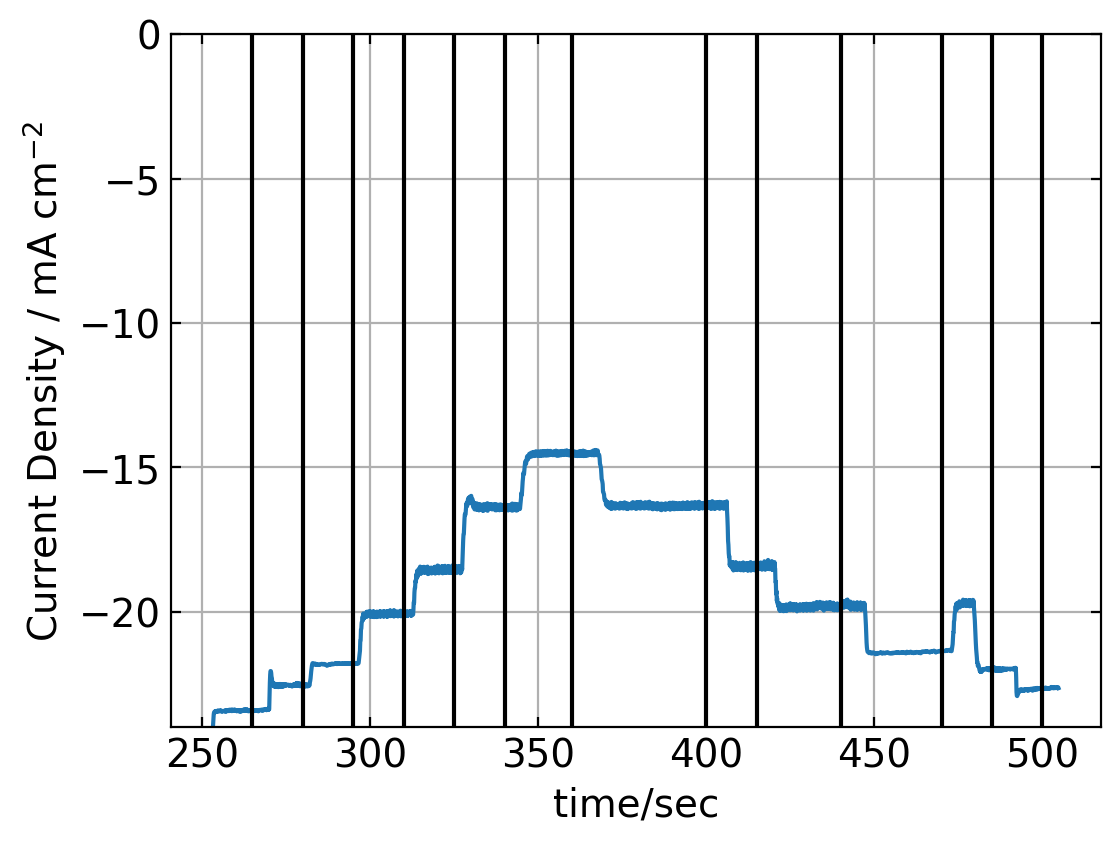

In [64]:
for df in ZnPVA_ECH_09[1:2]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-24,0)
    
grid()    

x_list = [265,280,295,310,325,340,360,400,415,440,470,485,500]
for i in x_list:
    axvline(x=i,color='black')


show() 

time_ZP09_2 = [265,280,295,310,325,340,360,400,415,440,470,485,500]
I_ZP09_2 = []
for i in arange(13):
    icd = ZnPVA_ECH_09[1]['icd'][ZnPVA_ECH_09[1]['time/s'] < time_ZP09_2[i]][-1:]
    I_ZP09_2.extend(-1/icd)
    

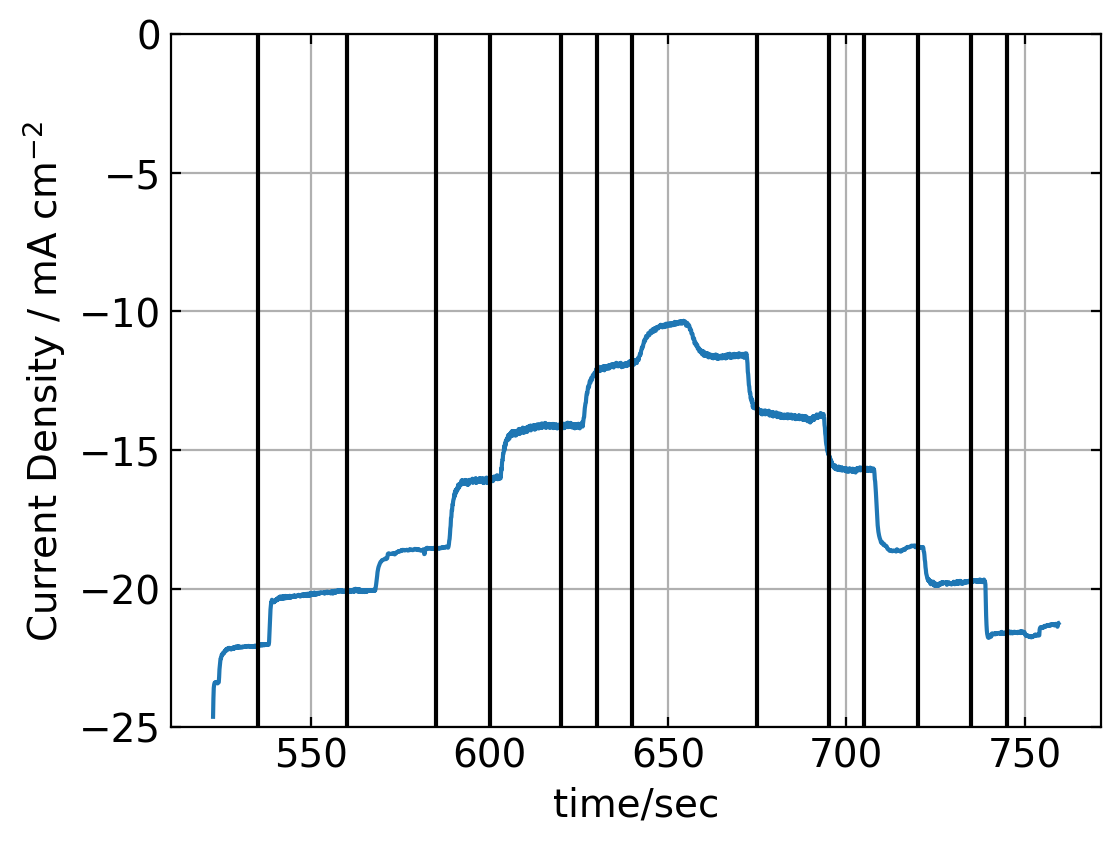

In [65]:
for df in ZnPVA_ECH_09[2:3]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-25,-0)
grid()  

x_list = [535,560,585,600,620,630,640,675,695,705,720,735,745]
for i in x_list:
    axvline(x=i,color='black')

show() 

time_ZP09_3 = [535,560,585,600,620,630,640,675,695,705,720,735,745]
I_ZP09_3 = []
for i in arange(13):
    icd = ZnPVA_ECH_09[2]['icd'][ZnPVA_ECH_09[2]['time/s'] < time_ZP09_3[i]][-1:]
    I_ZP09_3.extend(-1/icd)
    

In [66]:
ZnPVA_09_1600 = [I_ZP09_2[0],I_ZP09_2[12],I_ZP09_1[0],I_ZP09_1[12],I_ZP09_3[0],I_ZP09_3[12]]
ZnPVA_09_900 = [I_ZP09_2[1],I_ZP09_2[11],I_ZP09_1[1],I_ZP09_1[11],I_ZP09_3[1],I_ZP09_3[11]]
ZnPVA_09_625 = [I_ZP09_2[2],I_ZP09_2[10],I_ZP09_1[2],I_ZP09_1[10],I_ZP09_3[2],I_ZP09_3[10]]
ZnPVA_09_330 = [I_ZP09_2[3],I_ZP09_2[9],I_ZP09_1[3],I_ZP09_1[9],I_ZP09_3[3],I_ZP09_3[9]]
ZnPVA_09_220 = [I_ZP09_2[4],I_ZP09_2[8],I_ZP09_1[4],I_ZP09_1[8],I_ZP09_3[4],I_ZP09_3[8]]
ZnPVA_09_140 = [I_ZP09_2[5],I_ZP09_2[7],I_ZP09_1[5],I_ZP09_1[7],I_ZP09_3[5],I_ZP09_3[7]]
ZnPVA_09_100 = [I_ZP09_2[6],I_ZP09_1[6],I_ZP09_3[6]]

avg_I_ZnPVA_09 = [mean(ZnPVA_09_1600),mean(ZnPVA_09_900),mean(ZnPVA_09_625),mean(ZnPVA_09_330),mean(ZnPVA_09_220),mean(ZnPVA_09_140),mean(ZnPVA_09_100)]

### Zn PVA at -1.0V/RHE

In [67]:
order = array([1,2,3])
ZnPVA_ECHlist_1 = [f'ZnPVAECH_1 RDE {i} ECH 1600 rpm K-L.mpt' for i in order]        
ZnPVA_ECH_1 = [ec.read_mpt(f)for f in ZnPVA_ECHlist_1]

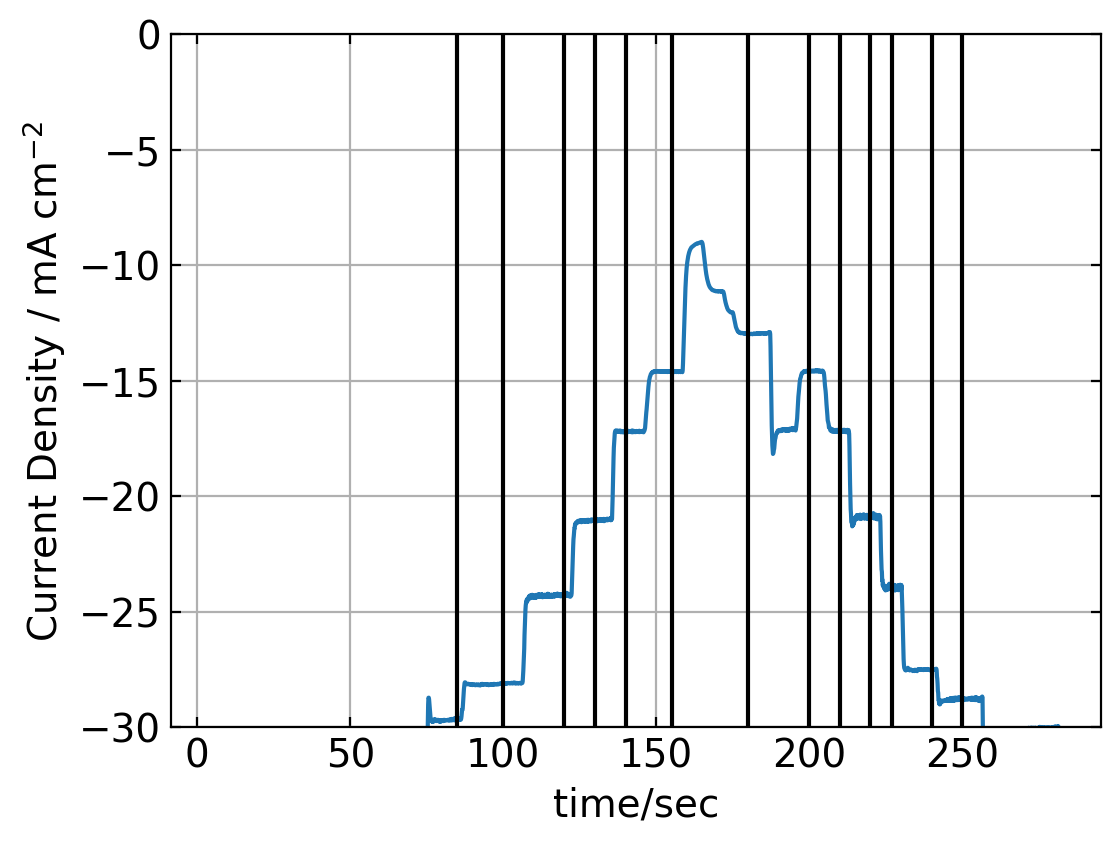

In [68]:
for df in ZnPVA_ECH_1[0:1]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-30,0)
    
grid()    

x_list =  [85,100,120,130,140,155,180,200,210,220,227,240,250]
for i in x_list:
    axvline(x=i,color='black')

show() 
time_ZP1_1 = [85,100,120,130,140,155,180,200,210,220,227,240,250]

I_ZP1_1 = []
for i in arange(13):
    icd = ZnPVA_ECH_1[0]['icd'][ZnPVA_ECH_1[0]['time/s'] < time_ZP1_1[i]][-1:]
    I_ZP1_1.extend(-1/icd)

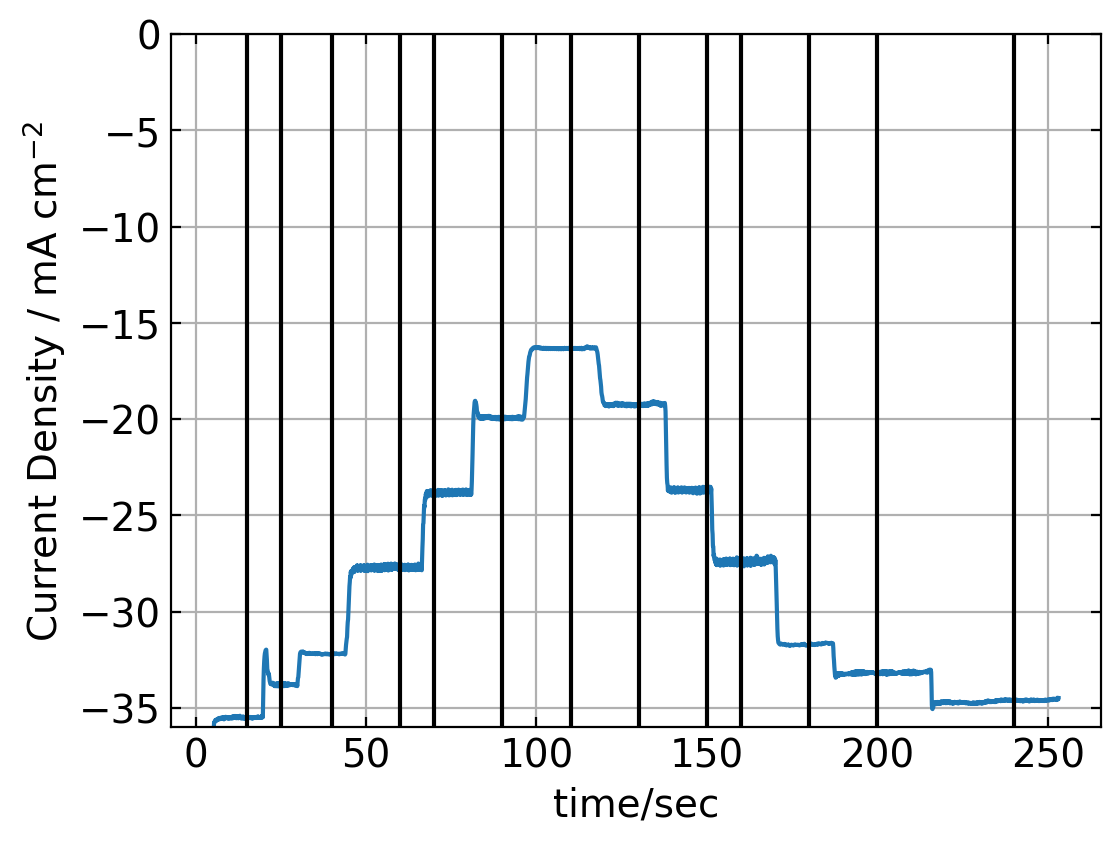

In [69]:
for df in ZnPVA_ECH_1[1:2]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-36,0)
grid()    

x_list = [15,25,40,60,70,90,110,130,150,160,180,200,240]
for i in x_list:
    axvline(x=i,color='black')


show() 

time_ZP1_2 = [15,25,40,60,70,90,110,130,150,160,180,200,240]
I_ZP1_2 = []
for i in arange(13):
    icd = ZnPVA_ECH_1[1]['icd'][ZnPVA_ECH_1[1]['time/s'] < time_ZP1_2[i]][-1:]
    I_ZP1_2.extend(-1/icd)

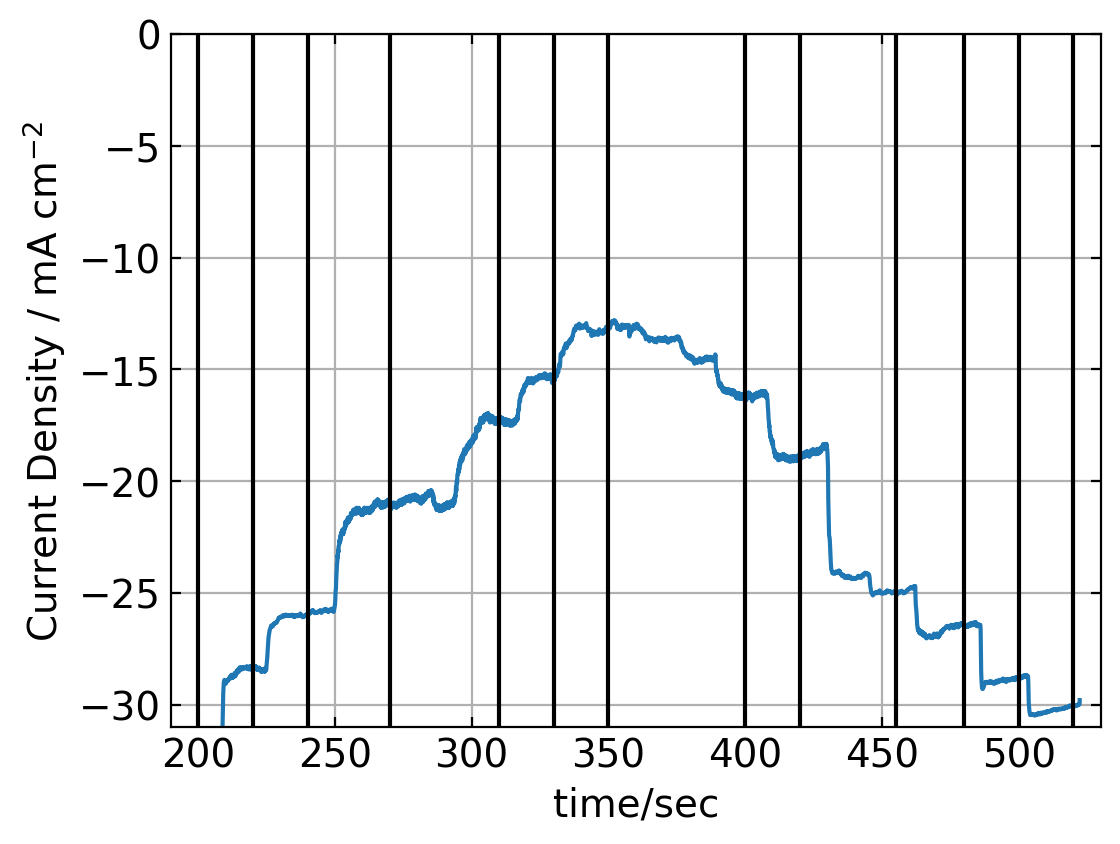

In [70]:
for df in ZnPVA_ECH_1[2:3]:
    icd = df['icd']
    time= df['time/s']
    plot(time,icd)
    
    xlabel('time/sec')
    ylabel('Current Density / mA cm$^{-2}$')
    ylim(-31,0)
    xlim(190,530)
grid()    

x_list = [200,220,240,270,310,330,350,400,420,455,480,500,520]
for i in x_list:
    axvline(x=i,color='black')
show() 

time_ZP1_3 = [200,220,240,270,310,330,350,400,420,455,480,500,520]
I_ZP1_3 = []
for i in arange(13):
    icd = ZnPVA_ECH_1[2]['icd'][ZnPVA_ECH_1[2]['time/s'] < time_ZP1_3[i]][-1:]
    I_ZP1_3.extend(-1/icd)

In [71]:
ZnPVA_1_1600 = [I_ZP1_1[0],I_ZP1_1[12],I_ZP1_2[0],I_ZP1_2[12],I_ZP1_3[0],I_ZP1_3[12]]
ZnPVA_1_900 = [I_ZP1_1[1],I_ZP1_1[11],I_ZP1_2[1],I_ZP1_2[11],I_ZP1_3[1],I_ZP1_3[11]]
ZnPVA_1_625 = [I_ZP1_1[2],I_ZP1_1[10],I_ZP1_2[2],I_ZP1_2[10],I_ZP1_3[2],I_ZP1_3[10]]
ZnPVA_1_330 = [I_ZP1_1[3],I_ZP1_1[9],I_ZP1_2[3],I_ZP1_2[9],I_ZP1_3[3],I_ZP1_3[9]]
ZnPVA_1_220 = [I_ZP1_1[4],I_ZP1_1[8],I_ZP1_2[4],I_ZP1_2[8],I_ZP1_3[4],I_ZP1_3[8]]
ZnPVA_1_140 = [I_ZP1_1[5],I_ZP1_1[7],I_ZP1_2[5],I_ZP1_2[7],I_ZP1_3[5],I_ZP1_3[7]]
ZnPVA_1_100 = [I_ZP1_1[6],I_ZP1_2[6],I_ZP1_3[6]]

avg_I_ZnPVA_1 = [mean(ZnPVA_1_1600),mean(ZnPVA_1_900),mean(ZnPVA_1_625),mean(ZnPVA_1_330),mean(ZnPVA_1_220),mean(ZnPVA_1_140),mean(ZnPVA_1_100)]

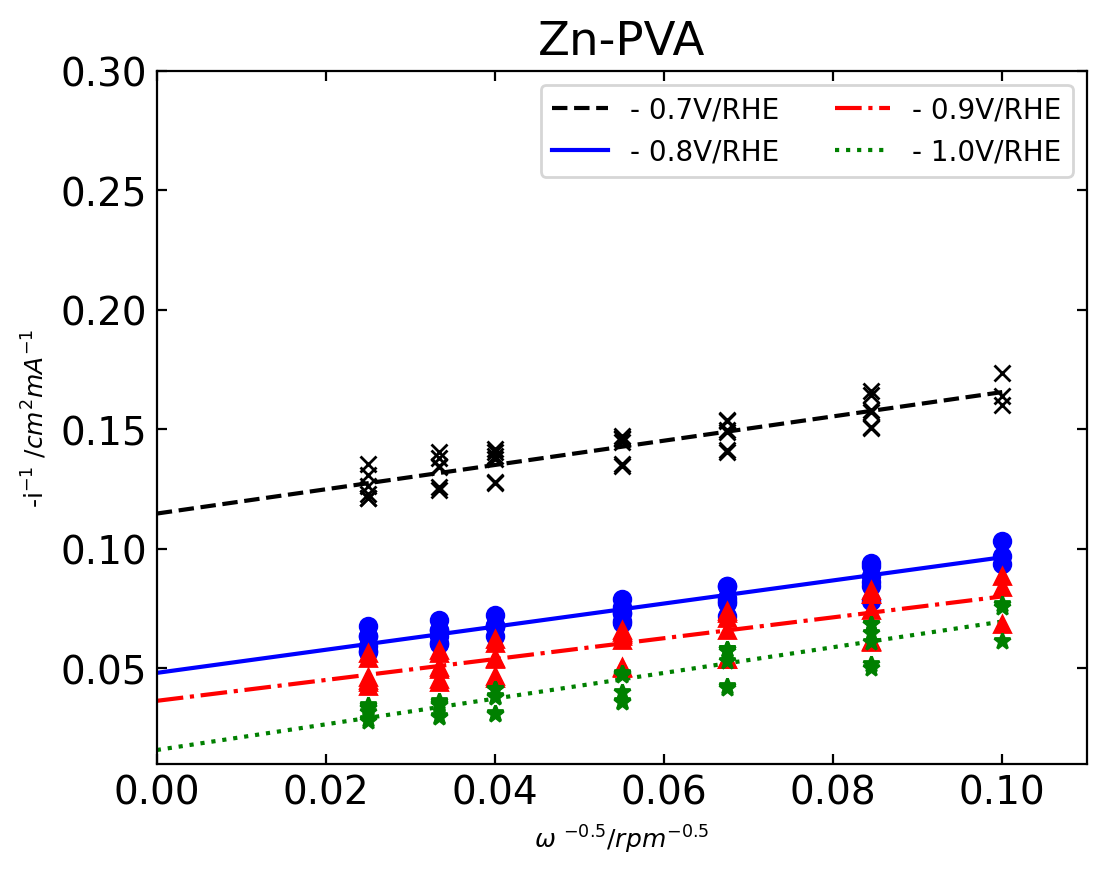

In [72]:
popt, pcov = curve_fit(line,1/sqrt(rpm_avg),avg_I_ZnPVA_07)
y_07_1 = popt[0]
y_07_2 = popt[1]
y_07_c = pcov

plot(X ,line(X,y_07_1,y_07_2),'k--')


popt, pcov = curve_fit(line,1/sqrt(rpm_avg),avg_I_ZnPVA_08)
y_08_1 = popt[0]
y_08_2 = popt[1]
y_08_c = pcov

plot(X ,line(X,y_08_1,y_08_2),'b-')

popt, pcov = curve_fit(line,1/sqrt(rpm_avg),avg_I_ZnPVA_09)
y_09_1 = popt[0]
y_09_2 = popt[1]
y_09_c = pcov

plot(X ,line(X,y_09_1,y_09_2),'r-.')

popt, pcov = curve_fit(line,1/sqrt(rpm_avg),avg_I_ZnPVA_1)
y_1_1 = popt[0]
y_1_2 = popt[1]
y_1_c = pcov
plot(X ,line(X,y_1_1,y_1_2),'g:')

ylim(0.01,0.30)
xlim(0,0.11)


X = linspace(0,0.1,20)

plot(1/sqrt(rpm), I_ZP07_2,'x',color = 'black')
plot(1/sqrt(rpm), I_ZP07_1,'x',color = 'black')
plot(1/sqrt(rpm), I_ZP07_3,'x',color = 'black')


plot(1/sqrt(rpm), I_ZP08_1,'o',color = 'blue')
plot(1/sqrt(rpm), I_ZP08_2,'o',color = 'blue')
plot(1/sqrt(rpm), I_ZP08_3,'o',color = 'blue')

plot(1/sqrt(rpm), I_ZP09_2,'^',color = 'red')
plot(1/sqrt(rpm), I_ZP09_1,'^',color = 'red')
plot(1/sqrt(rpm), I_ZP09_3,'^',color = 'red')


plot(1/sqrt(rpm), I_ZP1_1,'*',color = 'green')
plot(1/sqrt(rpm), I_ZP1_3,'*',color = 'green')
plot(1/sqrt(rpm), I_ZP1_2,'*',color = 'green')


xlabel('${\omega\ }^{-0.5} / {rpm}^{-0.5}$',fontsize=9)
ylabel('-i$^{-1}$ /$cm^{2}mA^{-1}}$',fontsize=9)
title("Zn-PVA")
legend(['- 0.7V/RHE','- 0.8V/RHE','- 0.9V/RHE','- 1.0V/RHE'],ncol=2, prop={'size':10})
savefig("average K-L ZnPVA ECH.png", dpi = 300)

show()

In [73]:
l_07 =  1/(y_07_2+sqrt(diag(y_07_c))[1])
u_07 = 1/(y_07_2-sqrt(diag(y_07_c))[1])

l_08 = 1/(y_08_2+sqrt(diag(y_08_c))[1])
u_08 = 1/(y_08_2-sqrt(diag(y_08_c))[1])

l_09 = 1/(y_09_2+sqrt(diag(y_09_c))[1])
u_09 = 1/(y_09_2-sqrt(diag(y_09_c))[1])

l_1 = 1/(y_1_2+sqrt(diag(y_1_c))[1])
u_1 = 1/(y_1_2-sqrt(diag(y_1_c))[1])

In [94]:
print(f'ik at -0.7V/RHE =  {-(1/y_07_2):.2f} ± {((u_07-l_07)/2):.2f} mA/cm2') 
print(f'ik at -0.8V/RHE =  {-(1/y_08_2):.2f} ± {((u_08-l_08)/2):.2f} mA/cm2') 
print(f'ik at -0.9V/RHE =  {-(1/y_09_2):.2f} ± {((u_09-l_09)/2):.2f} mA/cm2') 
print(f'ik at -1.0V/RHE =  {-(1/y_1_2):.2f} ± {((u_1-l_1)/2):.2f} mA/cm2' ) 

ik at -0.7V/RHE =  -8.71 ± 0.07 mA/cm2
ik at -0.8V/RHE =  -20.78 ± 0.68 mA/cm2
ik at -0.9V/RHE =  -27.46 ± 0.46 mA/cm2
ik at -1.0V/RHE =  -63.13 ± 7.12 mA/cm2


In [75]:
n07 = 1/ (0.62 * F * D**(2/3) * v**(-1/6) * C * y_07_1 * sqrt(0.0166))
n08 = 1/ (0.62 * F * D**(2/3) * v**(-1/6) * C * y_08_1 * sqrt(0.0166))
n09 = 1/ (0.62 * F * D**(2/3) * v**(-1/6) * C * y_09_1 * sqrt(0.0166))
n1  =1/ (0.62 * F * D**(2/3) * v**(-1/6) * C * y_1_1 * sqrt(0.0166))

In [76]:
n_ZP = [n07,n08,n09,n1]
m_ZP=[y_07_1,y_08_1,y_09_1,y_1_1]
dndm_ZP = n_ZP/array(m_ZP)
wm_ZP = [sqrt(diag(y_07_c))[0],sqrt(diag(y_08_c))[0],sqrt(diag(y_09_c))[0],sqrt(diag(y_1_c))[0]]
wn_ZP = dndm_ZP * wm_ZP

### Number of electrons transferred

In [83]:
print(f'n at -0.7V/RHE =  {n07:.2f}'' ± 'f'{wn_ZP[0]:.2f}' ) 
print(f'n at -0.8V/RHE =  {n08:.2f}'' ± 'f'{wn_ZP[1]:.2f}' ) 
print(f'n at -0.9V/RHE =  {n09:.2f}'' ± 'f'{wn_ZP[2]:.2f}' ) 
print(f'n at -1.0V/RHE =  {n1:.2f}'' ± ' f'{wn_ZP[3]:.2f}' ) 

n at -0.7V/RHE =  2.40 ± 0.07
n at -0.8V/RHE =  2.52 ± 0.13
n at -0.9V/RHE =  2.79 ± 0.06
n at -1.0V/RHE =  2.27 ± 0.12


### Combine

In [78]:
P_07 = [-l_07,-u_07]
P_08 = [-l_08,-u_08]
P_09 = [-l_09,-u_09]
P_1 = [-l_1,-u_1]

PG_07 = [-l_07_G,-u_07_G]
PG_08 = [-l_08_G,-u_08_G]
PG_09 = [-l_09_G,-u_09_G]
PG_1 = [-l_1_G,-u_1_G]

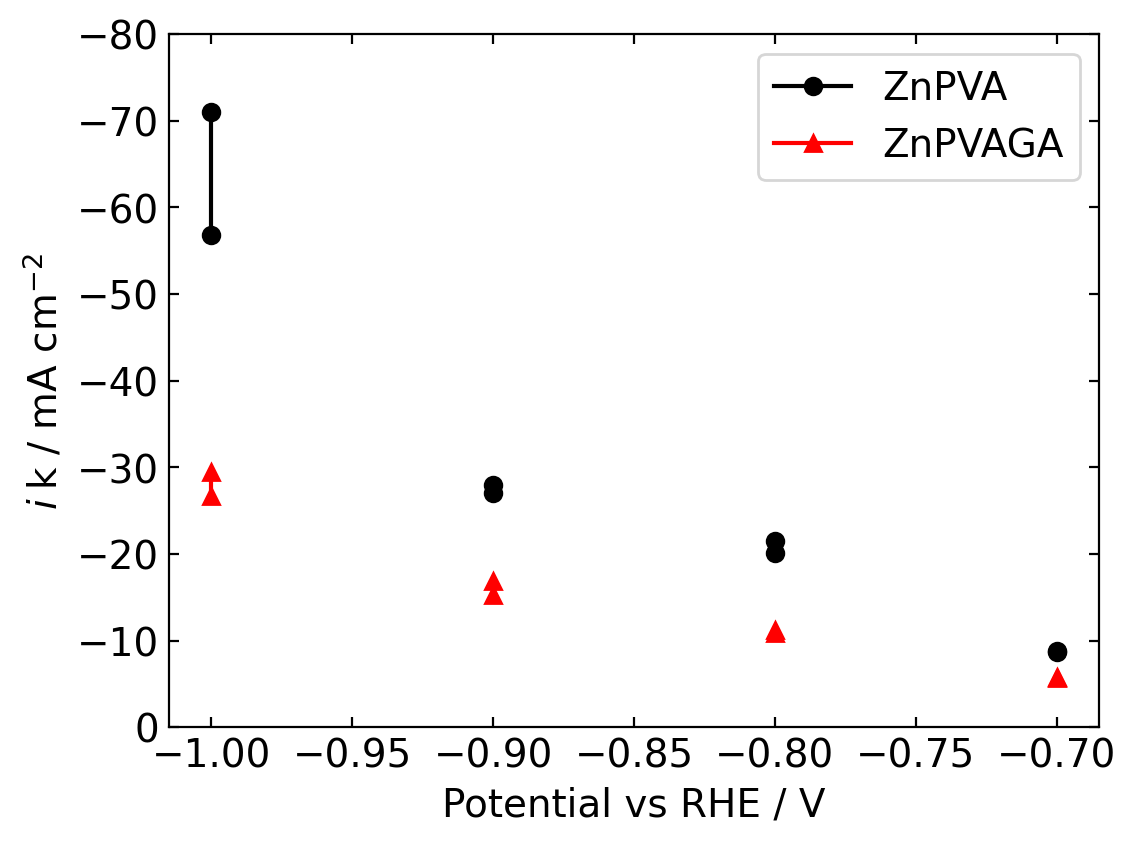

In [79]:
plot(ones(size(P_07))*-0.7,P_07,'-ko')
plot(ones(size(PG_07))*-0.7,PG_07,'-r^')

plot(ones(size(P_08))*-0.8,P_08,'-ko')
plot(ones(size(P_09))*-0.9,P_09,'-ko')
plot(ones(size(P_1))*-1.0,P_1,'-ko')

plot(ones(size(PG_08))*-0.8,PG_08,'-r^')
plot(ones(size(PG_09))*-0.9,PG_09,'r^')
plot(ones(size(PG_1))*-1.0,PG_1,'-r^')

xlabel('Potential vs RHE / V')
ylabel('$i_ \mathrm{k}}$ / mA cm$^{-2}$')
ylim(0,-80)
legend(['ZnPVA','ZnPVAGA'])
savefig("ZnPVA ZnPVAGA ik.png",dpi=300)

### Zn-PVA Tafel slope

### When fitting all data at once

1.64 ± 0.07 mA/cm2 is exchange current density on ZPG
1.76 ± 0.04 mA/cm2 is exchange current density on ZP


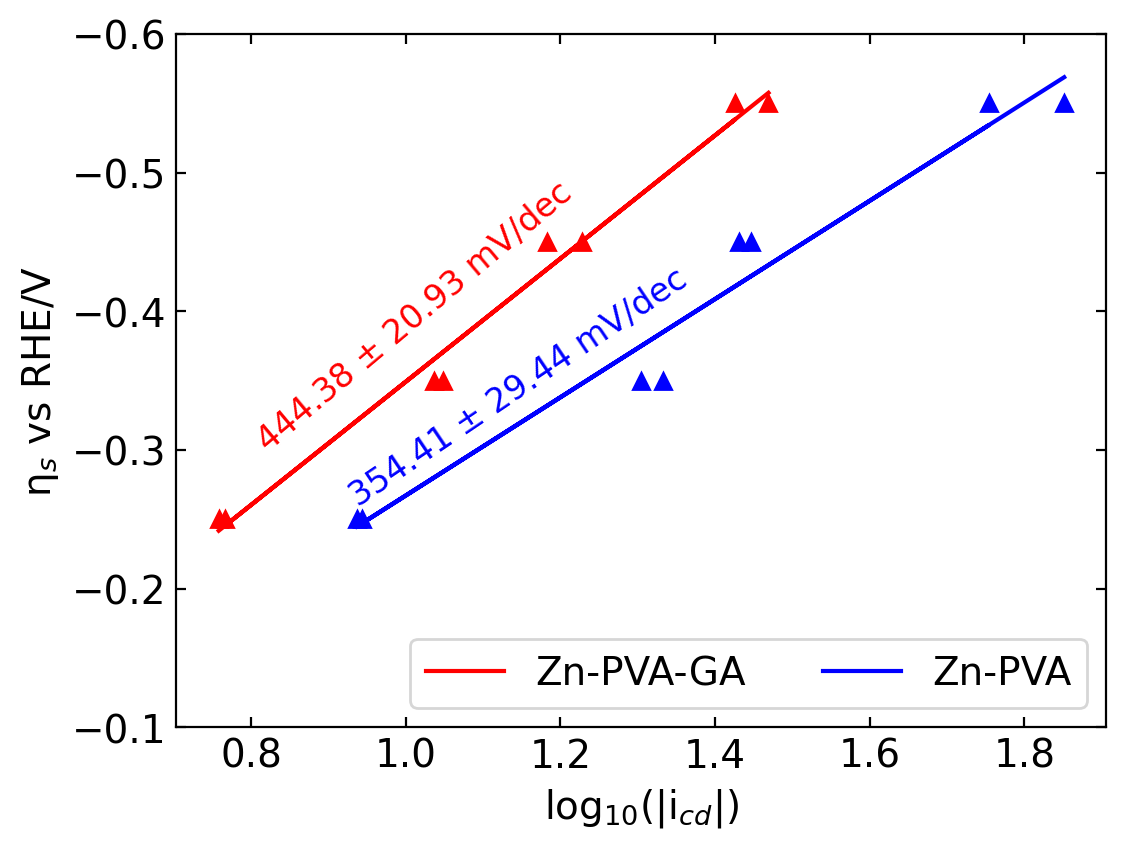

In [67]:
op = -0.45

ic_ZPG = [log10(l_07_G),log10(l_08_G),log10(l_09_G),log10(l_1_G),log10(u_07_G),log10(u_08_G),log10(u_09_G),log10(u_1_G)]

eta_ZPG =[-0.7 -op, -0.8-op, -0.9-op,-1-op,-0.7 -op, -0.8-op, -0.9-op,-1-op]

popt,pcov = curve_fit(line,ic_ZPG,eta_ZPG)
plot(ic_ZPG,line(array(ic_ZPG),popt[0],popt[1]),'-r')

ts_ZPG = popt[0]
error_ts_ZPG = sqrt(diag(pcov))[0]
error_y_ZPG = sqrt(diag(pcov))[1]
y_ZPG= popt[1]

ylim(-0.1,-0.6)
ecd_ZPG = 10**(-y_ZPG/ts_ZPG)
error_ecd_ZPG = 10**-(error_y_ZPG/error_ts_ZPG) 

text(0.80,-0.3,f'{-ts_ZPG*1000:.2f} ± {error_ts_ZPG*1000:.2f} mV/dec',color='r',rotation = 40,fontsize=12);
print(f'{ecd_ZPG:.2f} ± {error_ecd_ZPG:.2f} mA/cm2 is exchange current density on ZPG')

op = -0.45

ic_ZP = [log10(l_07),log10(l_08),log10(l_09),log10(l_1),log10(u_07),log10(u_08),log10(u_09),log10(u_1)]
eta_ZP = [-0.7 -op, -0.8-op, -0.9-op,-1-op,-0.7 -op, -0.8-op, -0.9-op,-1-op]

popt,pcov = curve_fit(line,ic_ZP,eta_ZP)
plot(ic_ZP,line(array(ic_ZP),popt[0],popt[1]),'-b')

ts_ZP = popt[0]
error_ts_ZP = sqrt(diag(pcov))[0]
y_ZP = popt[1]
error_y_ZP = sqrt(diag(pcov))[1]

ylim(-0.1,-0.6)
ecd_ZP = 10**(-y_ZP/ts_ZP)
error_ecd_ZP = 10**-(error_y_ZP/error_ts_ZP) 

text(0.92,-0.26,f'{-ts_ZP*1000:.2f} ± {error_ts_ZP*1000:.2f} mV/dec',color='b',rotation = 34,fontsize=12);
print(f'{ecd_ZP:.2f} ± {error_ecd_ZP:.2f} mA/cm2 is exchange current density on ZP')

plot(ic_ZPG,eta_ZPG,'^r')
plot(ic_ZP,eta_ZP,'^b')


ylabel('\u03B7$_{s}$ vs RHE/V')
xlabel('log$_{10}$(|i$_{cd}$|)')
legend(['Zn-PVA-GA','Zn-PVA'],loc='lower right',ncol=2)

savefig("Tafel Slops with all data fitted in log10 base.png", dpi=300)